# **Machine Learning Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Implementing Linear Regression**

In [ ]:
lr_train=pd.read_csv('/content/linear_regression_train.csv')

In [ ]:
lr_test=pd.read_csv('/content/linear_regression_test.csv')

**Separating input and output**

In [ ]:
x_train_lr=lr_train.drop(columns=['Target', 'ID'])
y_train_lr=lr_train['Target']
x_test_lr=lr_test.drop(columns=['ID'])
y_train_lr=y_train_lr.to_numpy()
x_train_lr=x_train_lr.to_numpy()
x_test_lr=x_test_lr.to_numpy()

**Cross Validation**

In [ ]:
x_cv_lr=x_train_lr[0:6000,:]
y_cv_lr=y_train_lr[0:6000]
x_train_lr=x_train_lr[6000:,:]
y_train_lr=y_train_lr[6000:]

**Shape of x train**

In [ ]:
m,n=x_train_lr.shape
m,n

(42000, 25)

**Before z-score normalisation**

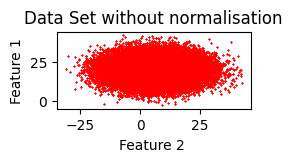

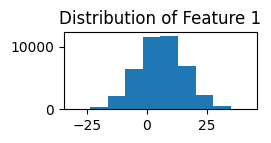

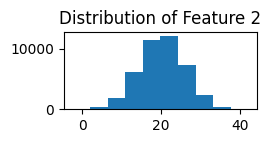

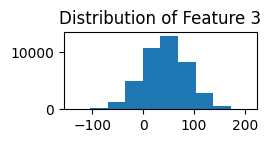

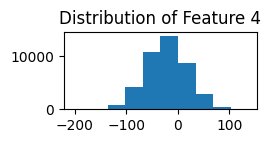

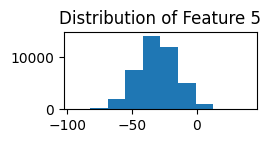

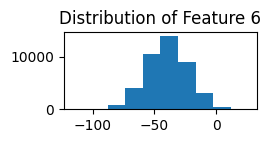

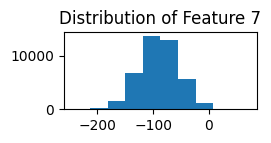

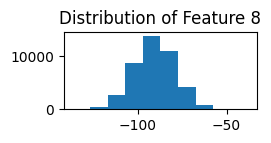

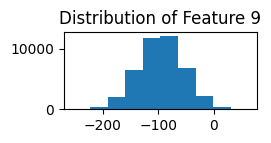

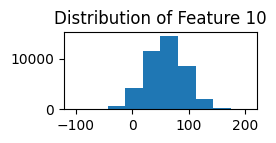

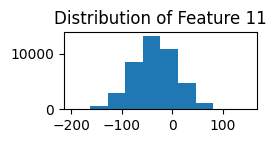

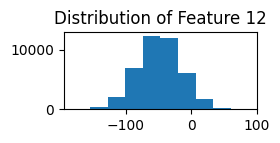

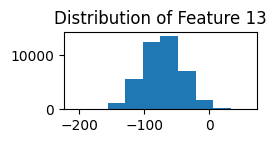

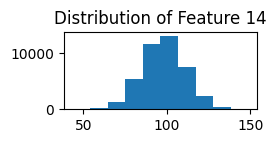

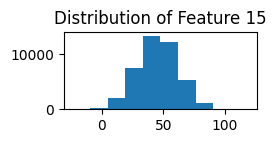

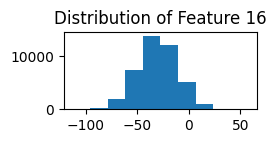

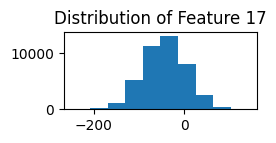

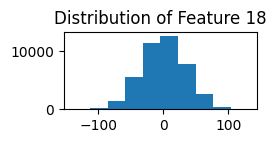

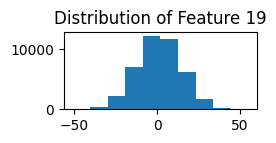

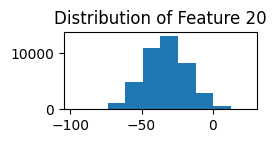

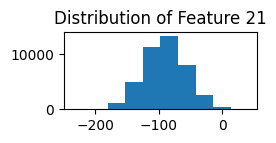

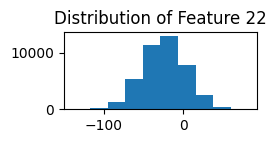

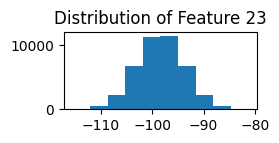

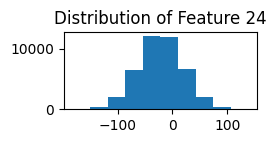

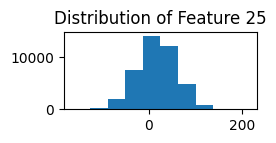

In [ ]:
#plot data points
plt.figure(figsize=(2.5, 1))
plt.plot(x_train_lr[:,0], x_train_lr[:,1], 'xr',markersize=1)
plt.title("Data Set without normalisation")
plt.ylabel('Feature 1')
plt.xlabel(f'Feature 2 ')
plt.show()
for i in range(n):
  plt.figure(figsize=(2.5, 1))
  plt.title(f"Distribution of Feature {i+1}")
  plt.hist(x_train_lr[:,i])
  plt.show()

**Z-score Normalisation**

In [ ]:
def z_score(x):
 x_mu=np.mean(x,axis=0)
 x_sigma=np.std(x,axis=0)
 x_norm=(x-x_mu)/x_sigma
 return (x_norm,x_mu,x_sigma)

In [ ]:
x_train_lr,x_mu,x_sigma=z_score(x_train_lr)
x_cv_lr=(x_cv_lr-x_mu)/x_sigma

**After z-score normalisation**

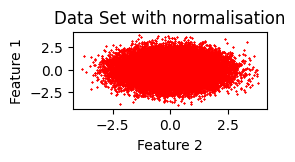

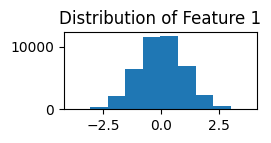

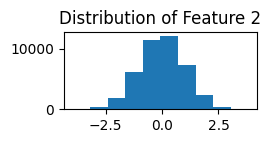

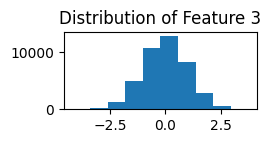

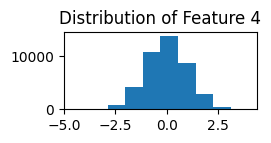

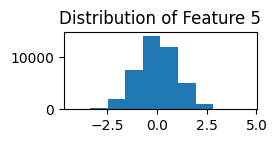

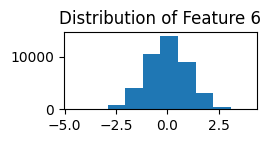

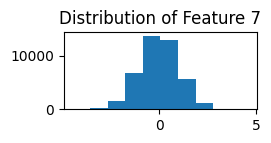

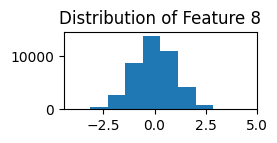

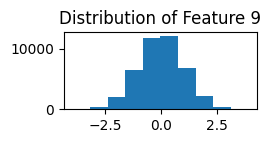

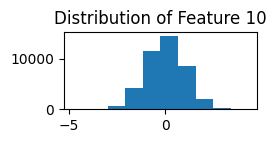

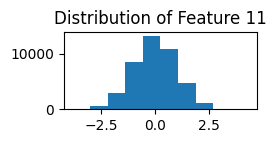

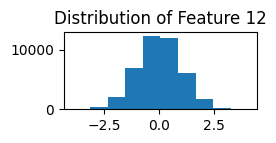

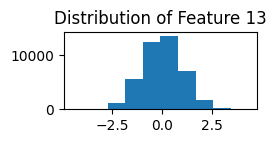

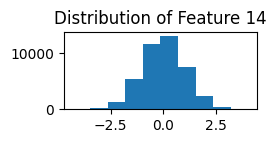

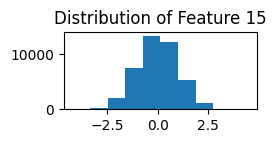

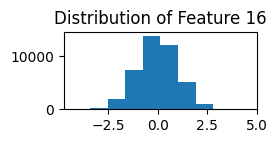

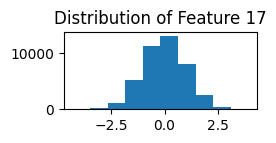

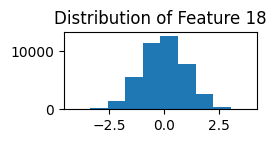

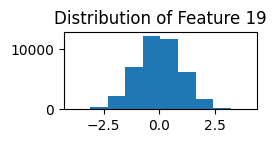

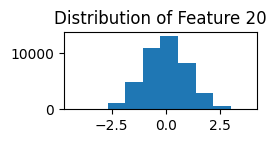

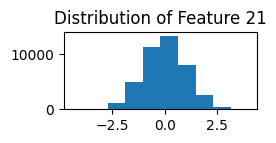

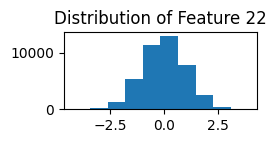

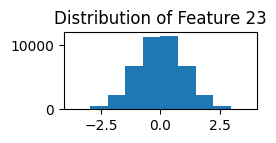

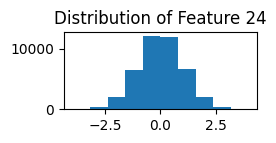

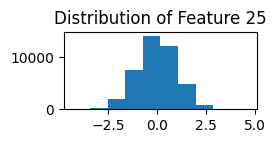

In [ ]:
#plot data points
plt.figure(figsize=(2.5, 1))
plt.plot(x_train_lr[:,0], x_train_lr[:,1], 'xr',markersize=1)
plt.title("Data Set with normalisation")
plt.ylabel('Feature 1')
plt.xlabel(f'Feature 2')
plt.show()
for i in range(n):
  plt.figure(figsize=(2.5, 1))
  plt.title(f"Distribution of Feature {i+1}")
  plt.hist(x_train_lr[:,i])
  plt.show()

In [ ]:
w_initial=np.zeros(n)
b_initial=0.0

**Compute cost**

In [ ]:
def compute_cost(x,y,w,b,lambda_):
  m=x.shape[0]
  cost=np.sum((np.dot(x,w)+b-y)**2)+((np.sum(w**2))*lambda_)
  cost=cost/(2*m)
  return cost

**Compute gradient**

In [ ]:
def compute_gradient(x,y,w,b,lambda_):
  m,n=x.shape
  dw,db=np.zeros((n,)),0.0
  for j in range(n):
   k=np.sum((np.dot(x,w)+b-y)*x[:,j])
   dw[j]=np.sum(k)+lambda_*w[j]
  db=np.sum(np.dot(x,w)+b-y)
  dw=dw/m
  db=db/m
  return dw,db


**Gradient Descent**

In [ ]:
def gradient_descent(x,y,w,b,alpha,compute_gradient,num_iters,lambda_):
  J=[]
  it=[]
  for i in range(num_iters):
    dw,db=compute_gradient(x,y,w,b,lambda_)
    w=w-alpha*dw
    b=b-alpha*db
    J.append(compute_cost(x,y,w,b,lambda_))
    it.append(i+1)
    if(i%100==0):
     print("iteration=",i,"cost=",compute_cost(x,y,w,b,lambda_),'dw=',dw,'db=',db)
  return w,b,J,it

**Calculating final values of w,b**

In [ ]:
#calculating final value of w and b
iterations=2000
alpha=0.03
lambda_=0.1
w,b,J_history,it_history=gradient_descent(x_train_lr,y_train_lr,w_initial,b_initial,alpha,compute_gradient,iterations,lambda_)
print(w,b,compute_cost(x_train_lr,y_train_lr,w,b,lambda_))

iteration= 0 cost= 2937088.268560093 dw= [-1.20114904e+02 -1.10805245e+01 -5.16903282e+02 -7.21657478e+02
 -2.35909865e-01 -8.18827836e+02 -4.49436762e+02 -8.70818611e+00
 -6.41807861e+02 -2.31162687e+02 -5.80109325e+00 -9.15532168e+00
 -7.52795921e+02 -6.60254842e+02  9.06662687e+00 -5.26170270e+02
 -2.65352614e+01 -4.52515129e+02 -4.04197805e+02 -6.91622776e+02
 -8.08998704e+01  1.64091878e+01 -1.08872409e+02 -5.00392665e+02
  1.20511863e+01] db= -1250.4308103694252
iteration= 100 cost= 64574.64949066371 dw= [ -7.09271788   1.01622626 -25.38020046 -36.12742595   0.11662578
 -37.81884275 -20.50000635   0.8898469  -31.36793445  -9.95028682
   0.40239889   0.87260434 -37.58723195 -31.82464304  -0.85212061
 -25.16186092  -2.03503614 -21.36721209 -20.6138484  -33.52047736
  -6.26481916  -1.71659653  -4.58962447 -22.51982255  -1.17658923] db= -59.46112102026369
iteration= 200 cost= 57916.76539082174 dw= [-0.40328101  0.12136703 -1.25755598 -1.80595405  0.00356578 -1.75997429
 -0.94329226  

Text(0, 0.5, 'Cost Function')

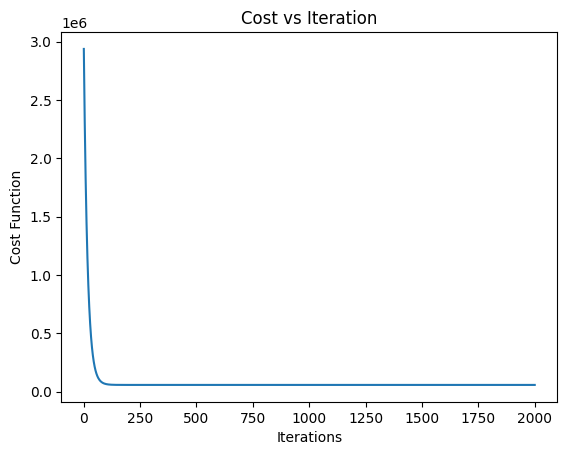

In [ ]:
#plot cost vs iteration
plt.plot(it_history,J_history)
plt.title('Cost vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

In [ ]:
w_final_1=w
b_final_1=b

**Mean Squared Error on cross validation data**

In [ ]:
y_pred_lr_cv=np.zeros(m)
y_pred_lr_cv=np.dot(x_cv_lr,w_final_1)+b_final_1
err=(y_pred_lr_cv-y_cv_lr)**2
print(y_pred_lr_cv,y_cv_lr,sep='\n')
err=np.mean(err)
print('Mean squared error=',err)
J_cv_lr=err/2
print('J_cv_lr=',J_cv_lr)

[ 4843.97472099 -1069.12212674 -1075.76410568 ... -1114.94008835
  2633.45292359   649.02350927]
[ 5235.69092808 -1221.44214589 -1102.75886179 ... -1130.94881776
  2753.33140507   740.98330507]
Mean squared error= 117991.88184288649
J_cv_lr= 58995.940921443245


**Target vs Prediction for original features**

[ 3472.05505366  1997.63683095 -1032.82633592 ... -1507.87173589
  4425.77133245 -2884.40769755]
[ 2993.05900027  1564.61969586  -960.0381976  ... -1703.21936555
  4551.70684165 -2800.86325604]


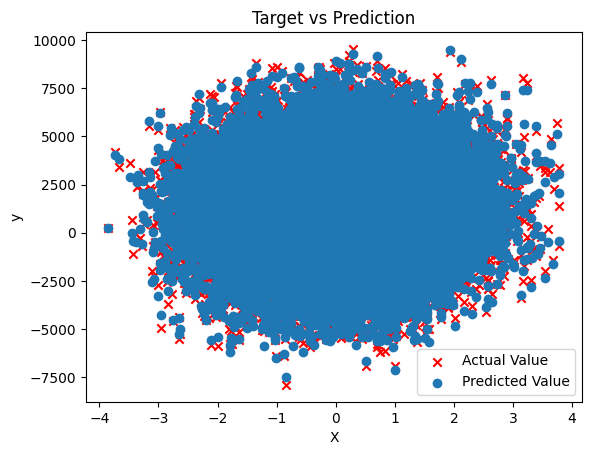

In [ ]:
#prediction for training data
y_pred_lr_train=np.zeros(x_train_lr.shape[0])
y_pred_lr_train=np.dot(x_train_lr,w_final_1)+b_final_1
print(y_pred_lr_train,y_train_lr,sep='\n')
y_i=y_train_lr
x_i=x_train_lr[:,0]
plt.scatter(x_i, y_i, marker='x', c='r', label="Actual Value"); plt.title("Target vs Prediction")
plt.scatter(x_i,np.dot(x_train_lr,w_final_1)+b_final_1, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

**Prediction of y for test data**

In [ ]:
y_pred_lr=np.zeros(x_test_lr.shape[0])
x_test_lr=(x_test_lr-x_mu)/x_sigma
for i in range(x_test_lr.shape[0]):
 y_pred_lr[i]=np.dot(x_test_lr[i],w_final_1)+b_final_1
print(y_pred_lr)

[1066.58663678 4497.47679793 4055.26332934 ... 4963.55717661 -263.06693519
  535.01624143]


## **Implementing Polynomial Regression**

In [ ]:
pr_train=pd.read_csv('/content/polynomial_regression_train.csv')
pr_test=pd.read_csv('/content/polynomial_regression_test.csv')

**Separating input and output**

In [ ]:
x_train_pr=pr_train.drop(columns=['Target', 'ID'])
y_train_pr=pr_train['Target']
x_test_pr=pr_test.drop(columns=['ID'])
y_train_pr=y_train_pr.to_numpy()
x_train_pr=x_train_pr.to_numpy()
x_test_pr=x_test_pr.to_numpy()

**Feature Engineering**

In [ ]:
def feature_engineering(x):
 m,n=x.shape
 features = [x[:, i].reshape(m, 1) for i in range(n)]
 deg2_terms =[features[i] * features[j] for i in range(n) for j in range(i,n)]
 deg3_terms =[features[i] * features[j] * features[k] for i in range(n) for j in range(i,n) for k in range(j,n)]
 deg4_terms =[features[i] * features[j] * features[k] * features[l] for i in range(n) for j in range(i,n) for k in range(j,n) for l in range(k,n)]
 deg5_terms =[features[i] * features[j] * features[k] * features[l] * features[m] for i in range(n) for j in range(i,n) for k in range(j,n) for l in range(k,n) for m in range(l,n)]
 x=np.hstack([x] + deg2_terms+ deg3_terms+deg4_terms+deg5_terms)
 return x

In [ ]:
x_train_pr=feature_engineering(x_train_pr)
x_test_pr=feature_engineering(x_test_pr)
m,n=x_train_pr.shape
m,n

(48000, 251)

**Cross Validation**

In [ ]:
x_cv_pr=x_train_pr[0:6000,:]
y_cv_pr=y_train_pr[0:6000]
x_train_pr=x_train_pr[6000:,:]
y_train_pr=y_train_pr[6000:]

In [ ]:
m,n=x_train_pr.shape
m,n

(36000, 251)

**Before z-score normalisation**

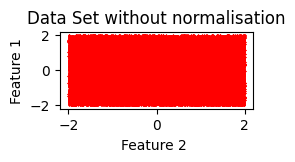

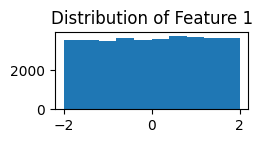

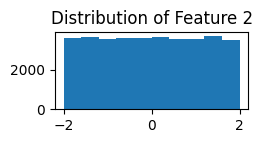

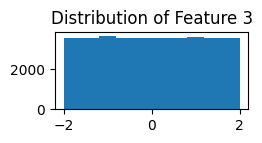

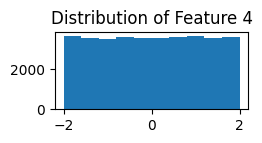

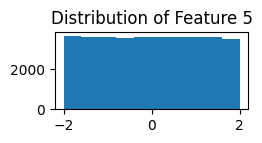

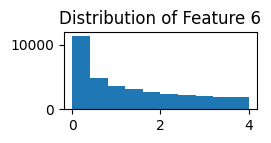

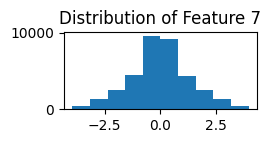

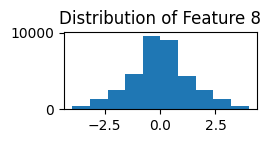

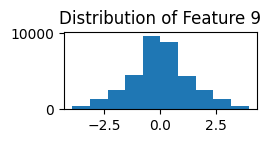

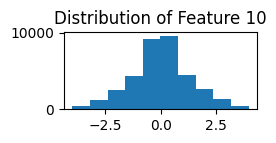

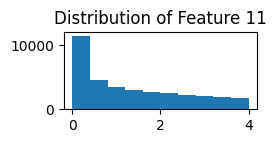

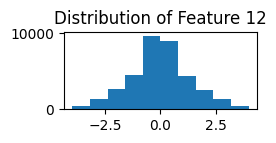

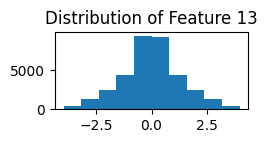

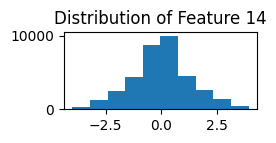

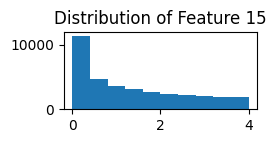

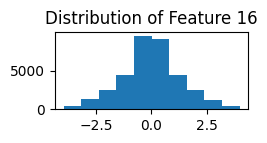

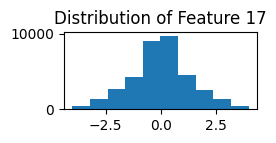

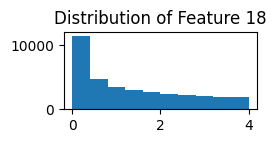

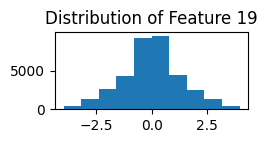

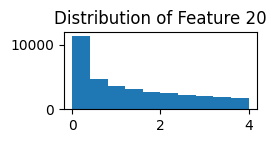

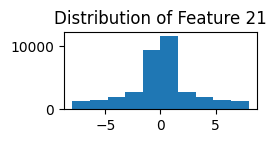

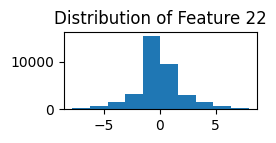

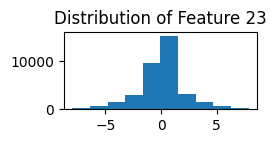

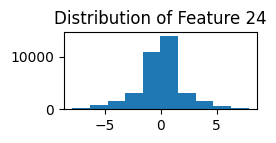

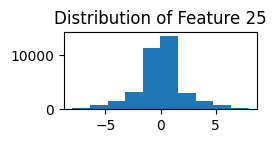

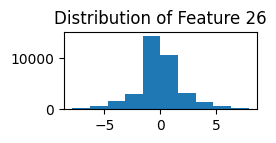

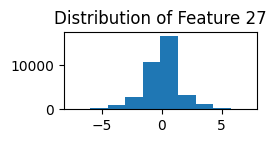

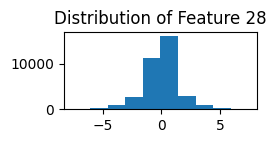

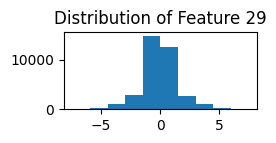

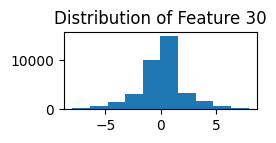

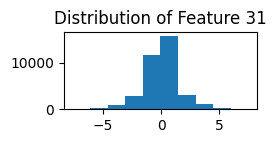

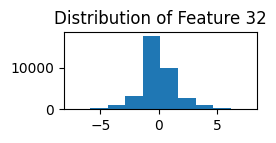

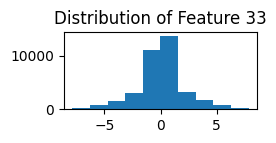

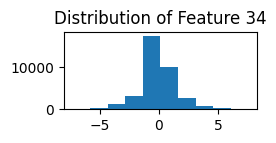

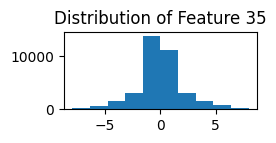

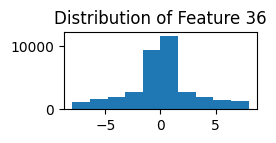

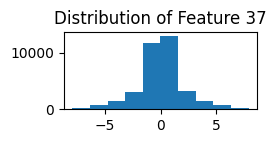

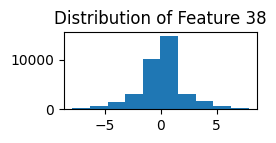

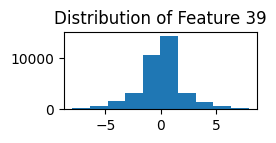

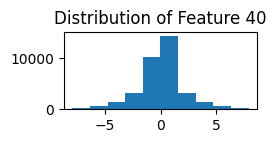

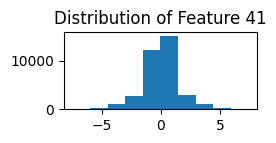

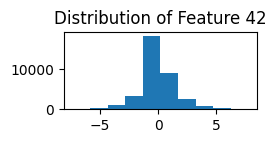

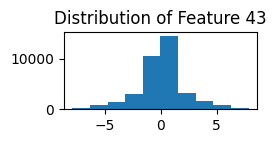

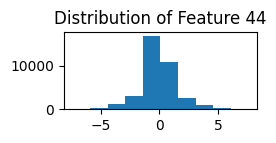

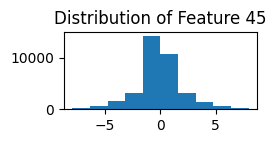

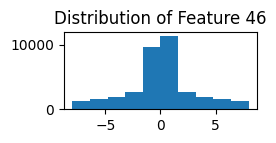

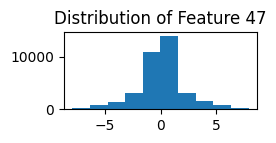

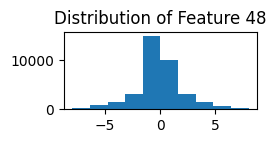

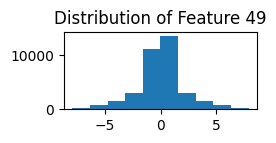

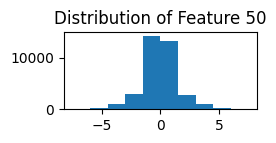

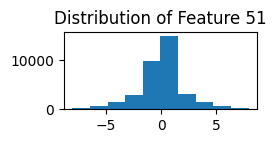

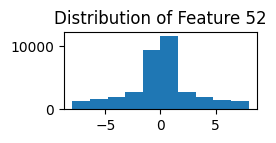

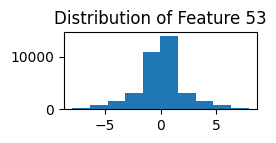

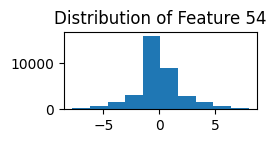

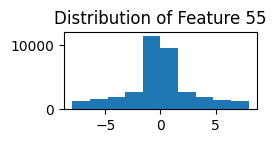

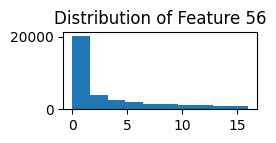

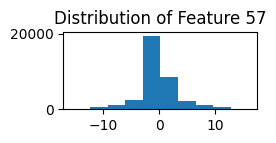

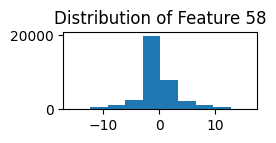

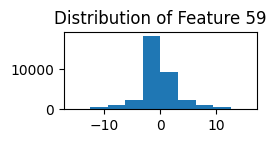

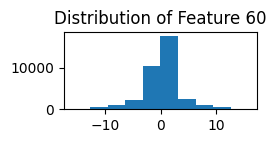

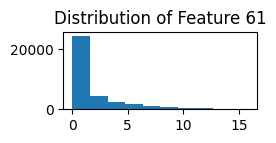

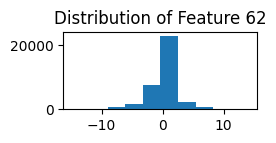

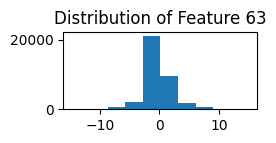

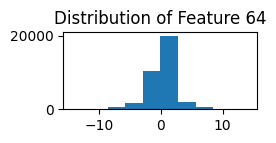

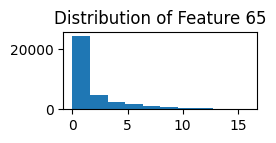

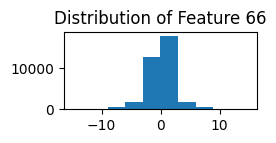

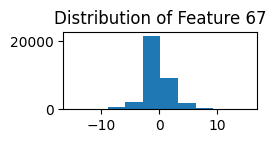

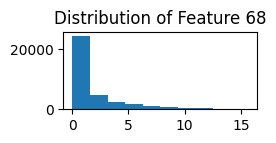

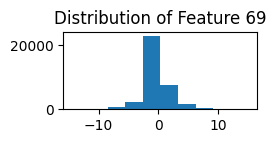

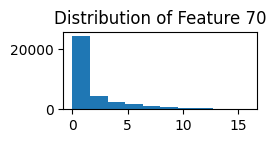

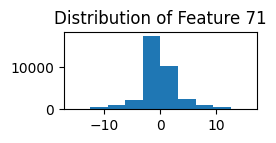

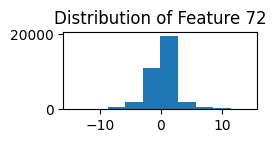

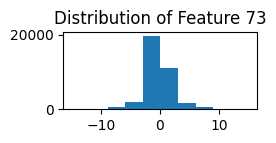

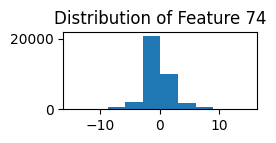

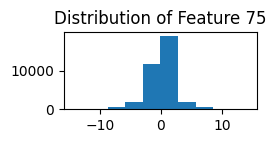

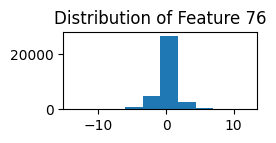

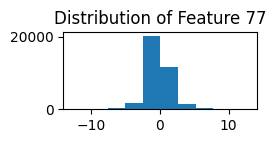

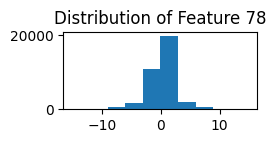

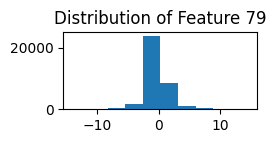

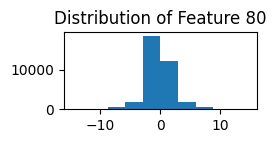

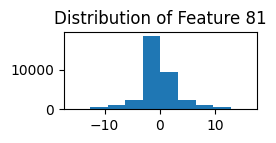

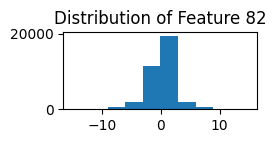

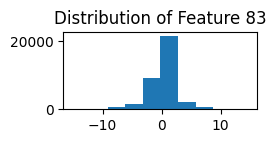

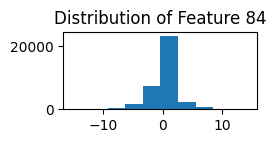

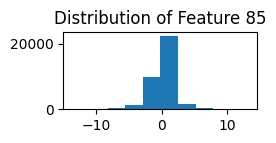

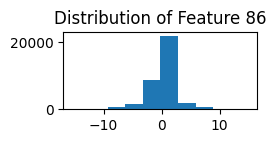

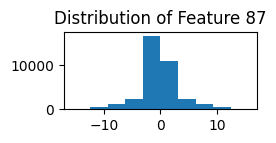

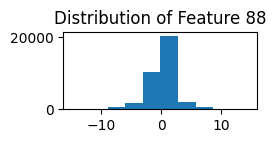

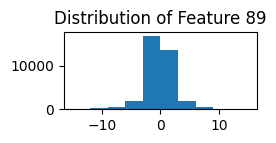

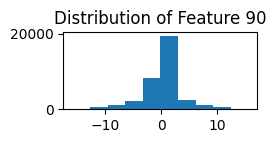

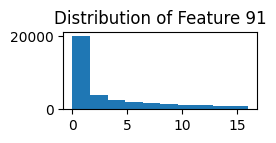

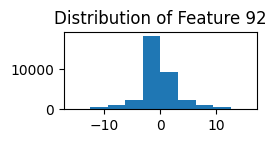

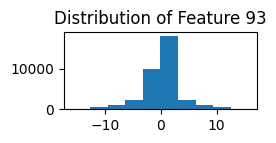

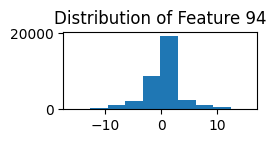

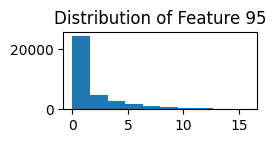

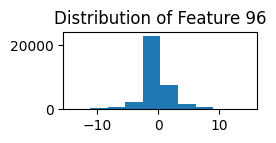

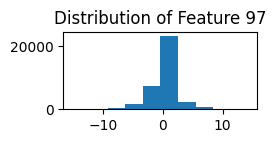

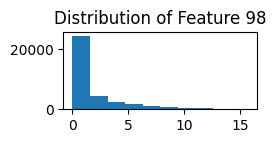

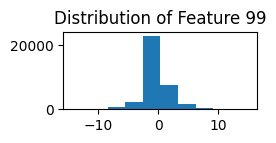

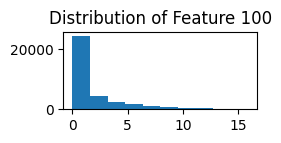

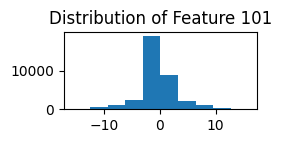

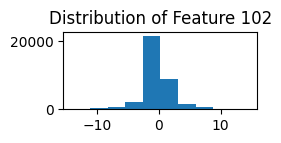

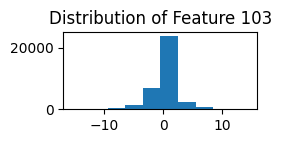

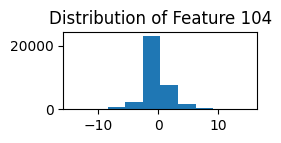

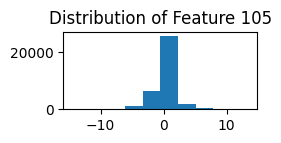

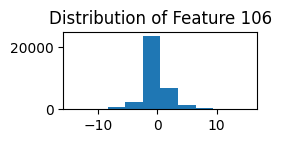

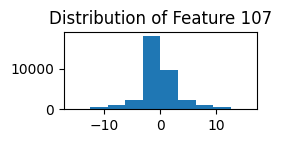

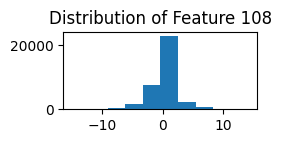

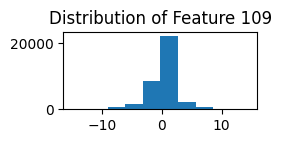

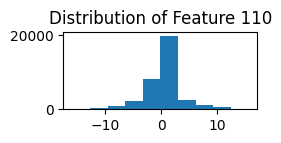

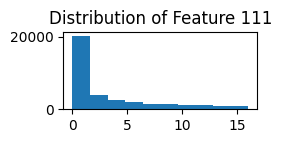

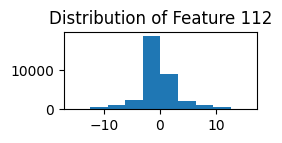

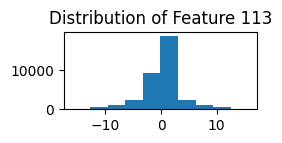

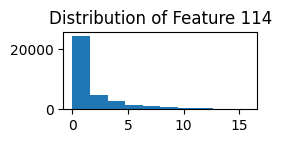

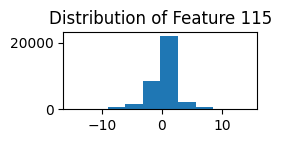

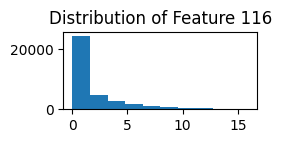

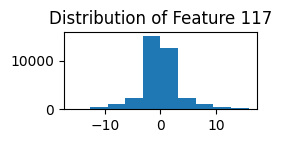

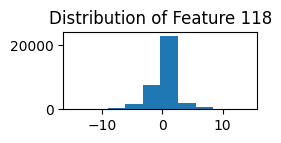

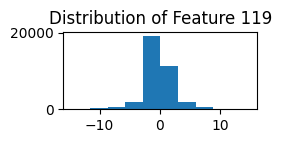

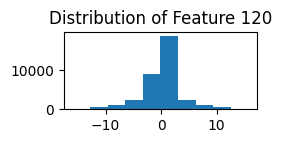

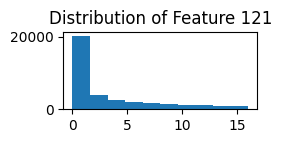

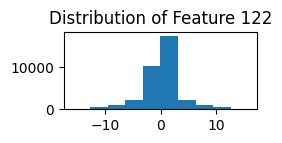

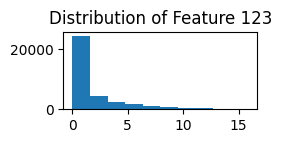

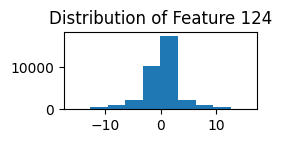

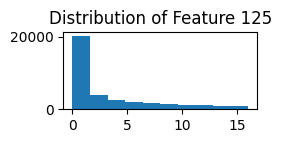

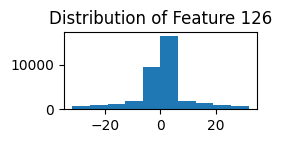

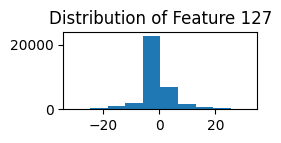

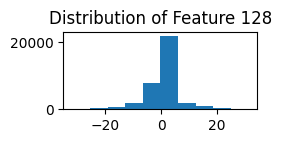

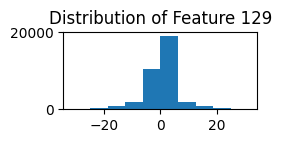

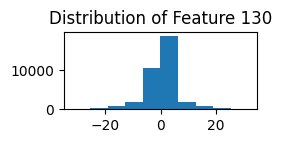

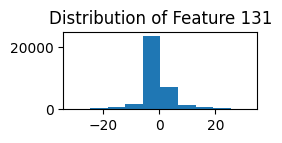

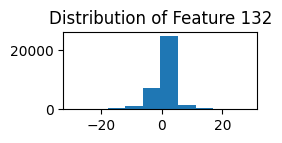

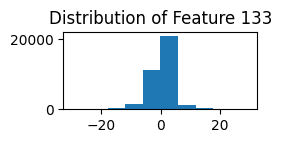

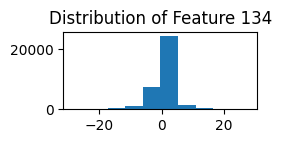

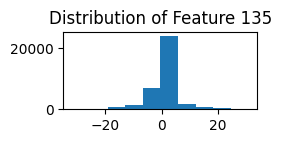

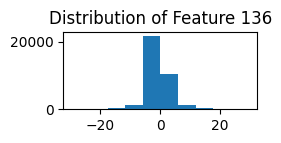

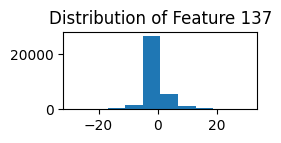

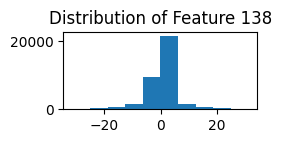

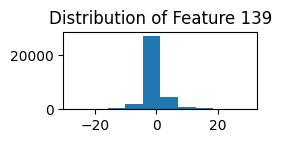

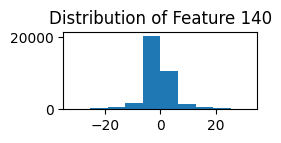

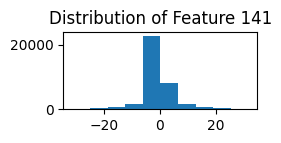

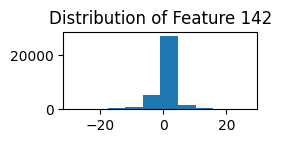

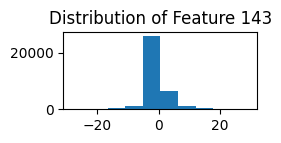

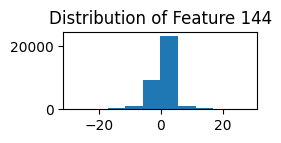

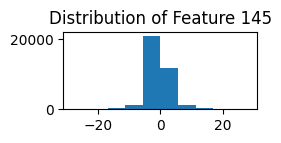

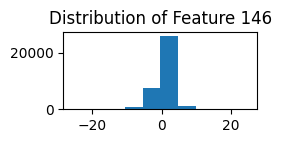

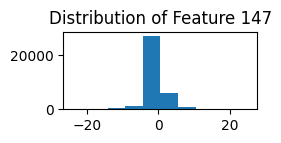

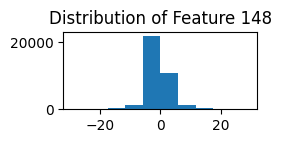

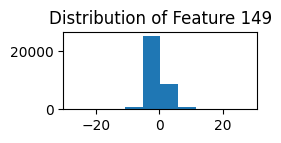

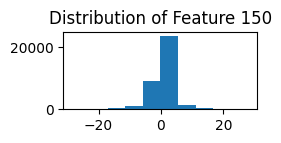

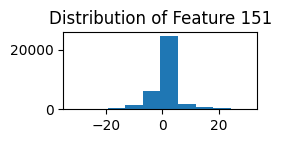

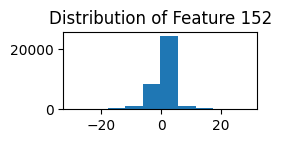

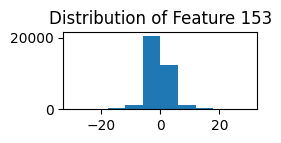

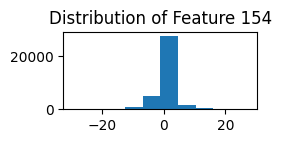

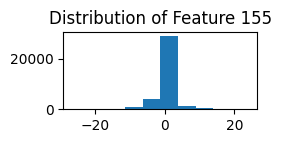

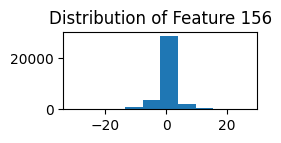

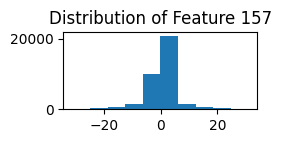

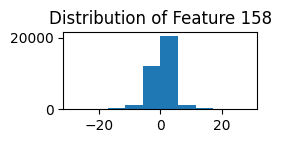

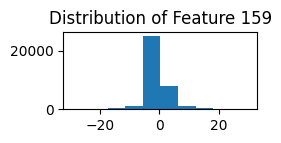

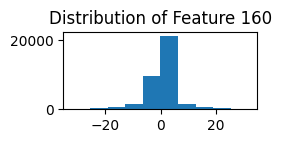

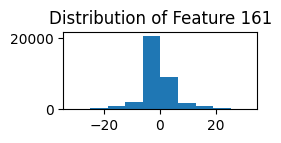

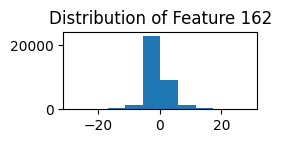

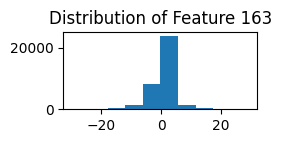

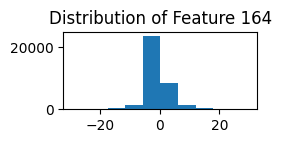

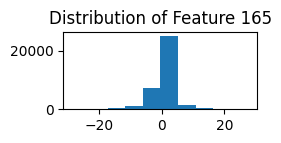

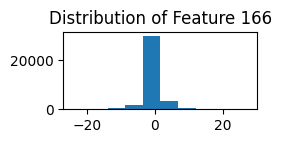

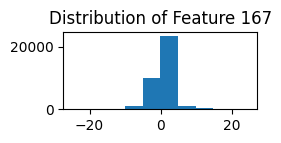

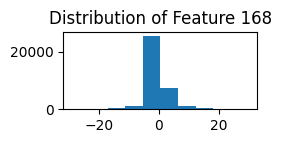

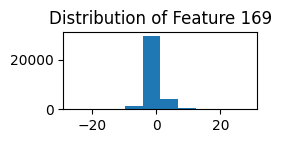

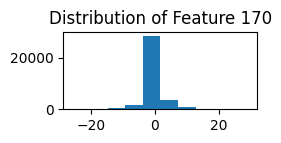

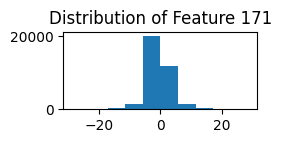

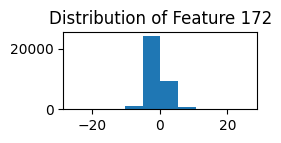

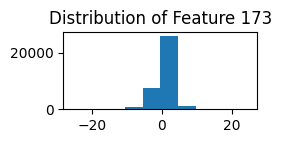

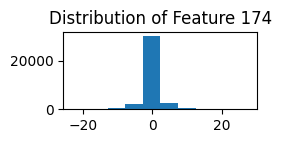

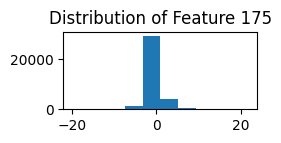

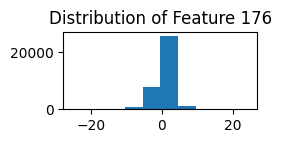

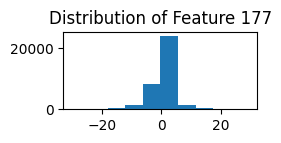

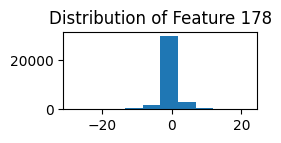

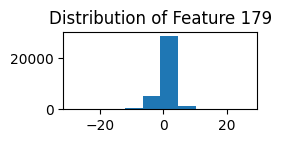

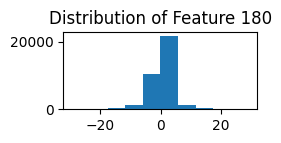

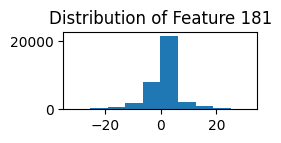

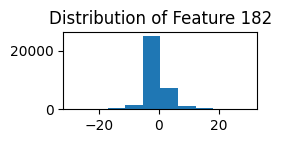

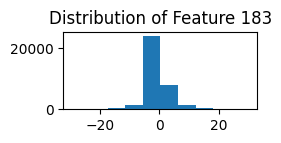

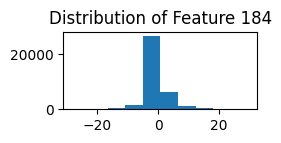

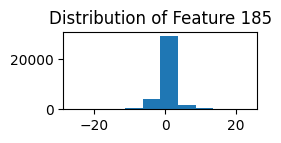

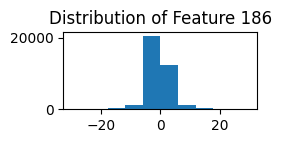

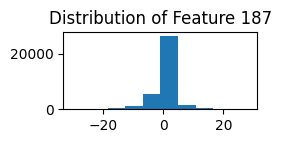

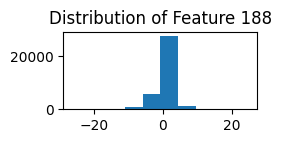

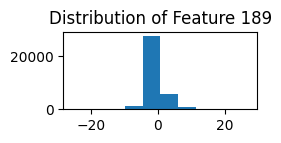

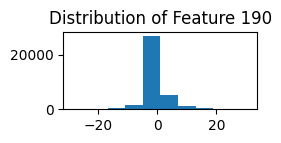

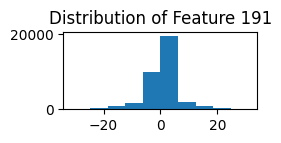

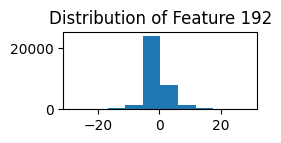

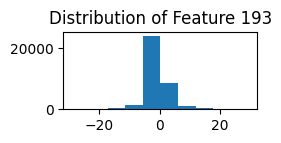

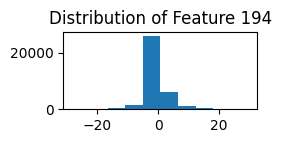

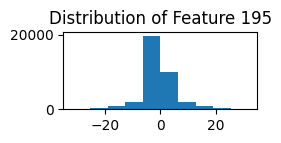

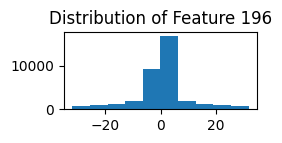

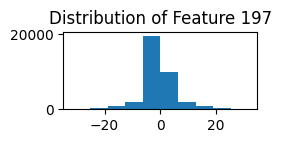

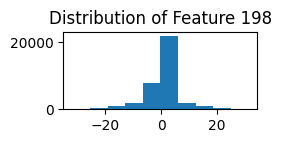

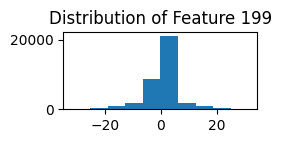

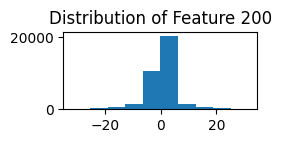

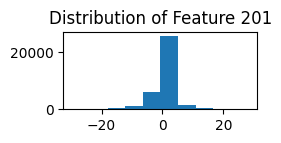

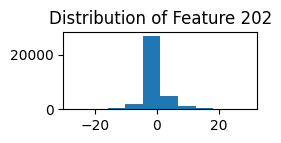

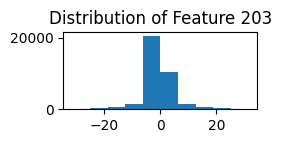

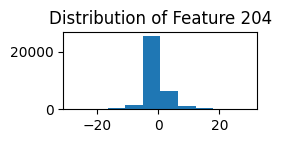

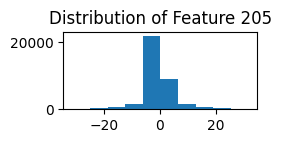

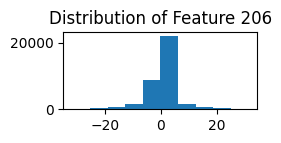

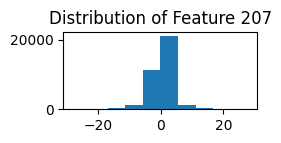

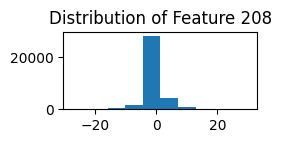

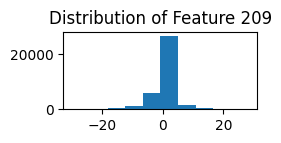

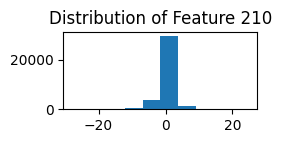

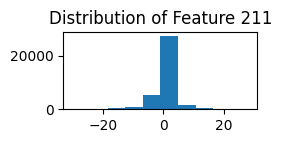

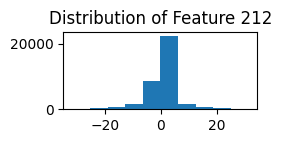

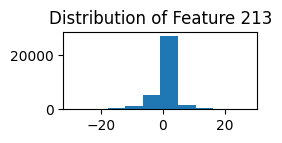

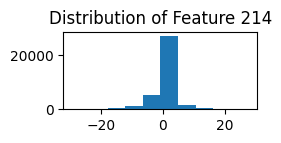

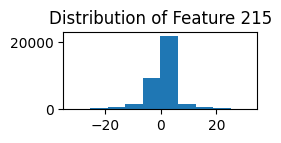

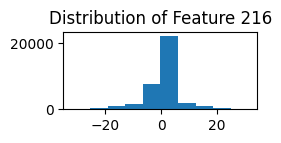

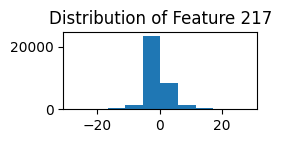

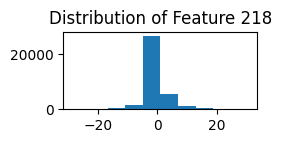

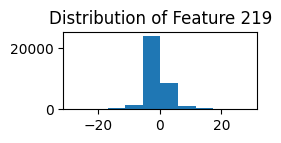

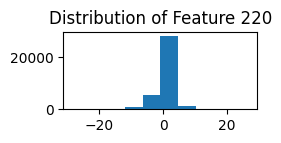

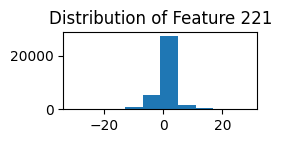

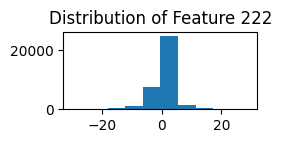

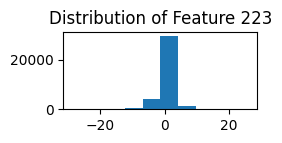

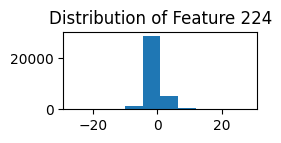

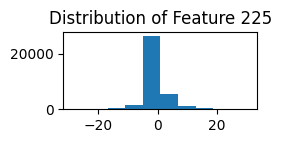

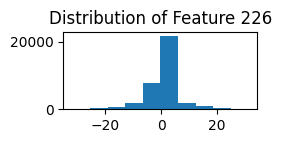

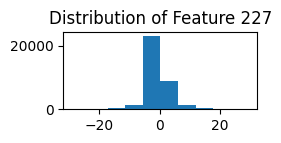

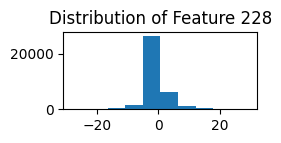

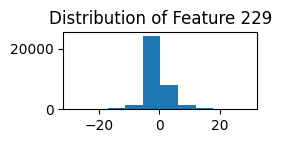

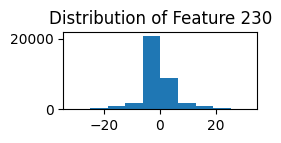

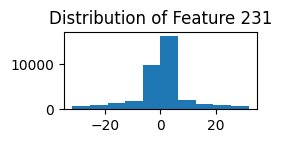

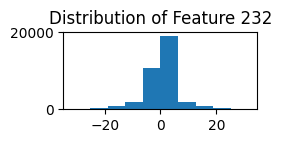

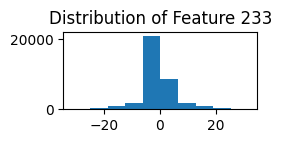

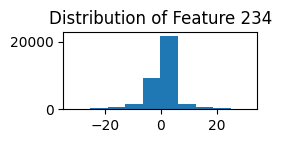

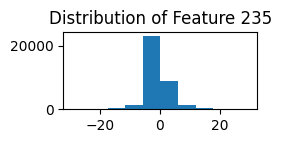

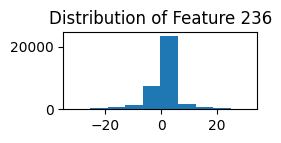

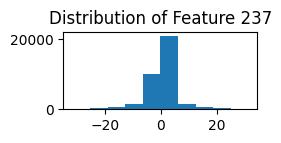

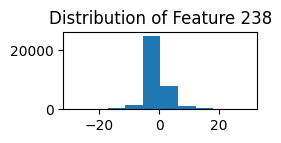

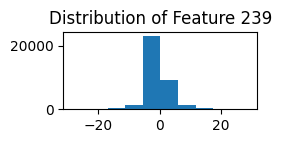

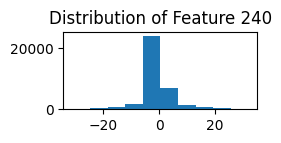

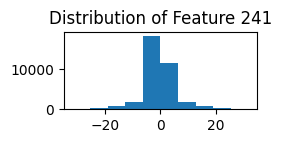

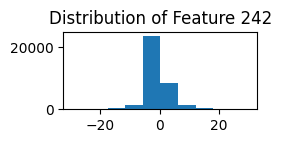

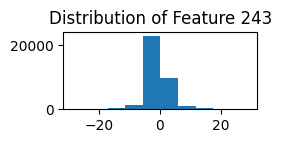

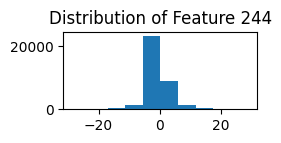

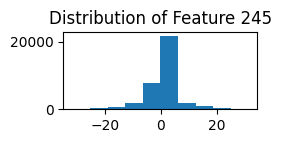

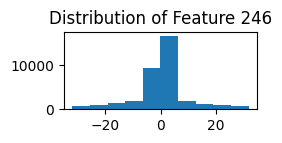

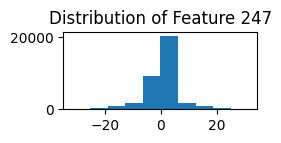

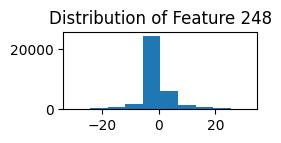

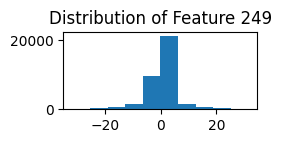

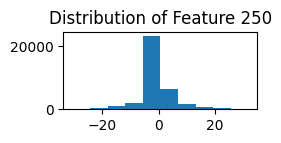

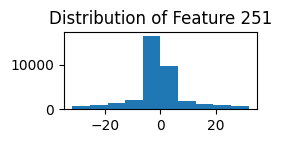

In [ ]:
#plot data points
plt.figure(figsize=(2.5, 1))
plt.plot(x_train_pr[:,0], x_train_pr[:,1], 'xr',markersize=1)
plt.title("Data Set without normalisation")
plt.ylabel('Feature 1')
plt.xlabel(f'Feature 2 ')
plt.show()
for i in range(n):
  plt.figure(figsize=(2.5, 1))
  plt.title(f"Distribution of Feature {i+1}")
  plt.hist(x_train_pr[:,i])
  plt.show()

**Z-score normalisation**

In [ ]:
x_train_pr,x_mu,x_sigma=z_score(x_train_pr)
x_cv_pr=(x_cv_pr-x_mu)/x_sigma
x_test_pr=(x_test_pr-x_mu)/x_sigma

**After z-score normalisation**

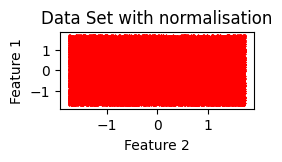

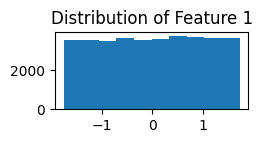

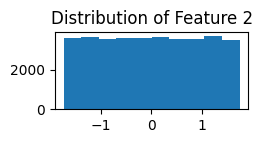

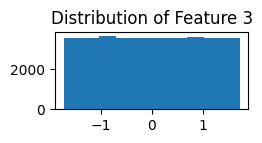

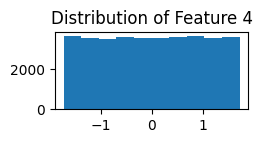

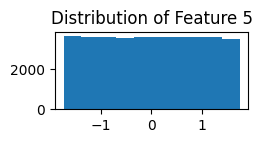

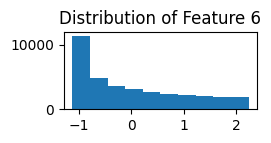

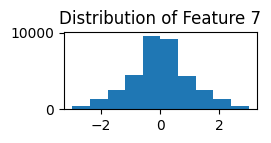

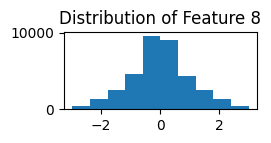

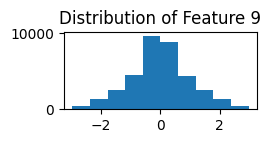

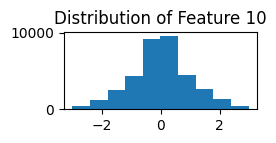

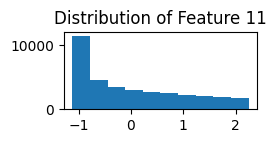

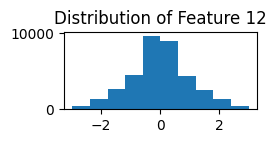

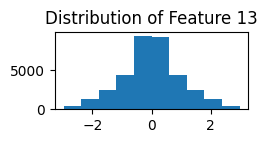

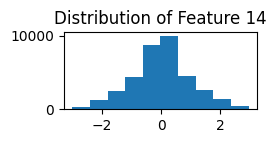

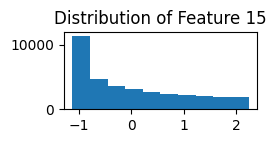

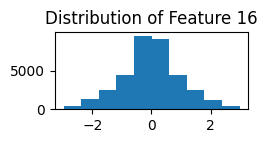

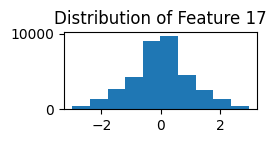

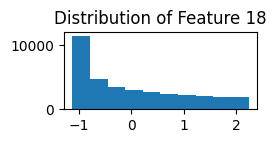

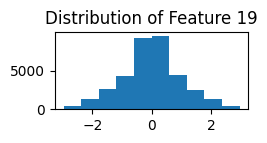

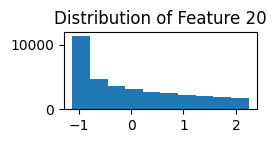

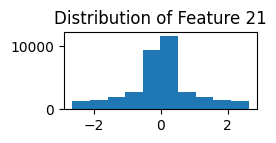

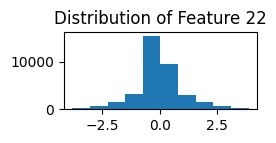

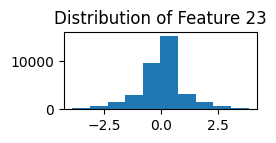

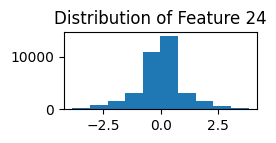

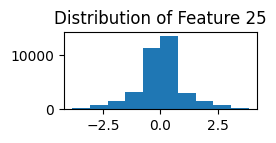

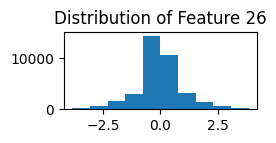

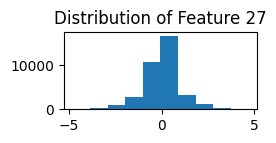

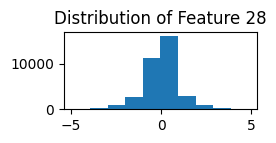

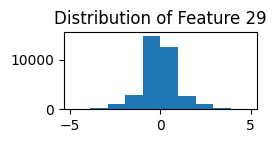

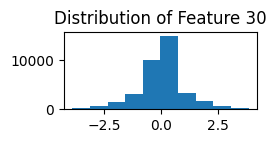

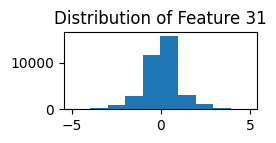

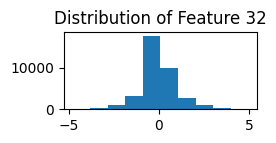

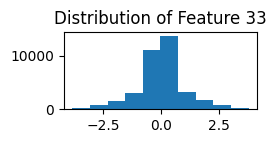

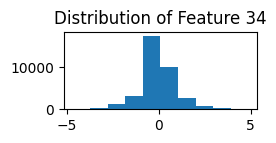

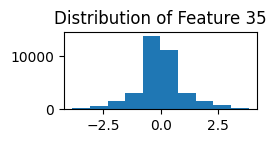

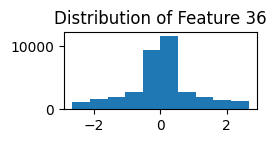

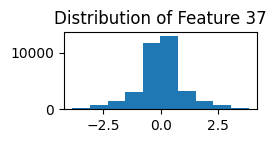

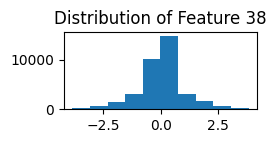

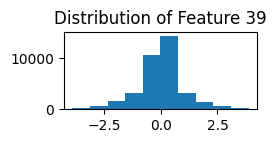

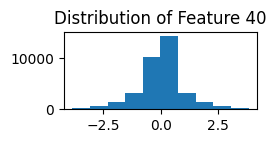

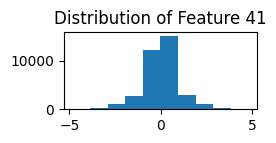

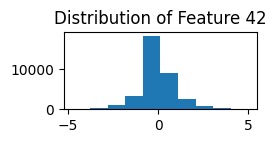

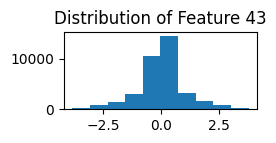

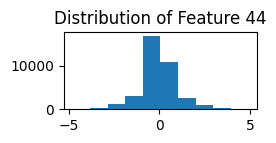

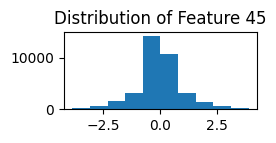

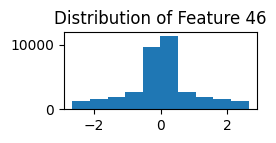

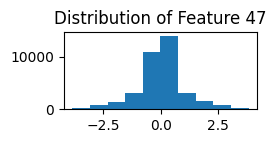

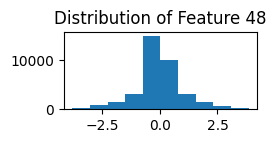

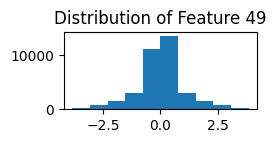

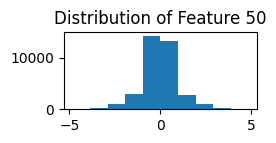

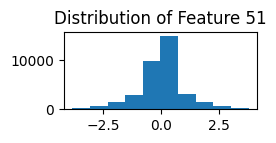

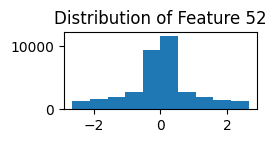

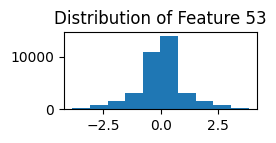

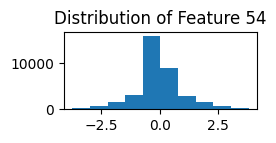

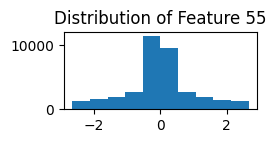

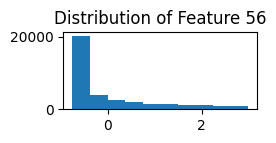

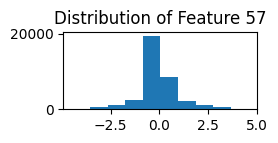

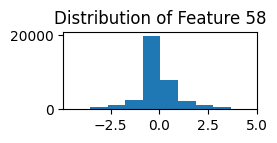

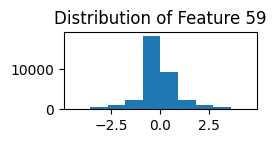

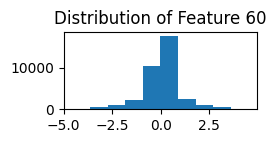

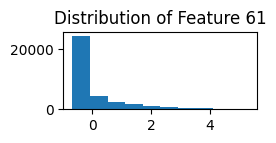

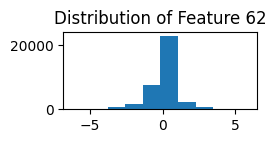

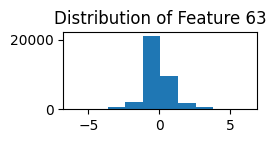

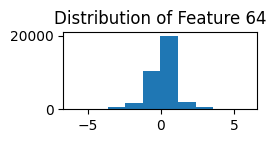

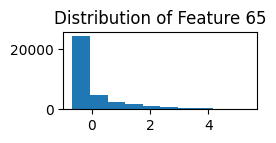

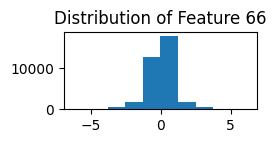

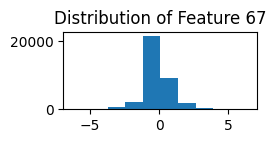

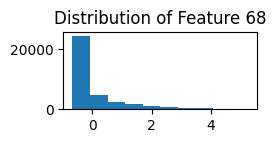

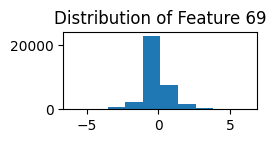

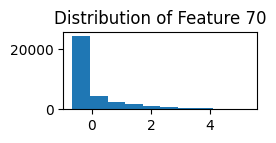

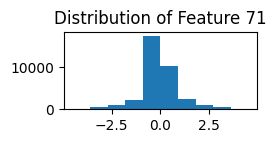

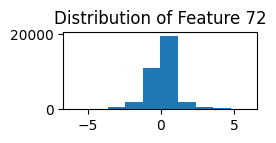

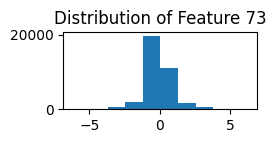

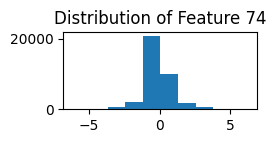

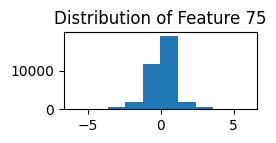

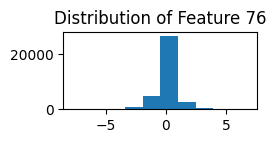

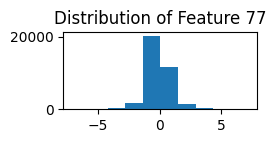

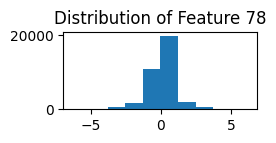

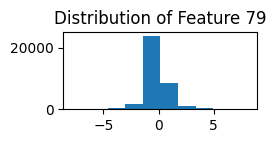

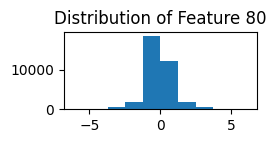

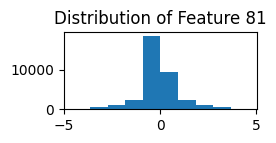

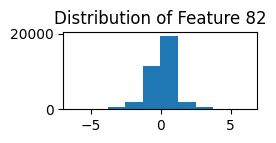

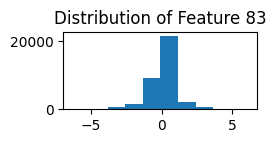

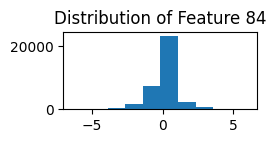

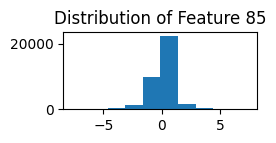

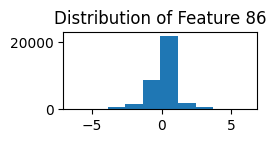

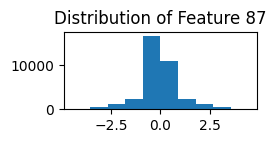

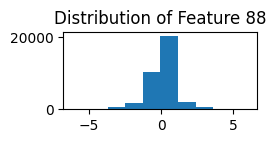

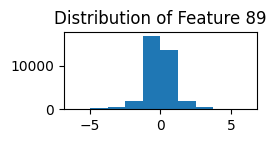

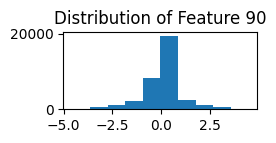

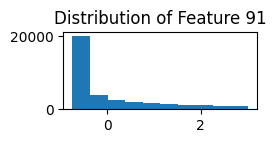

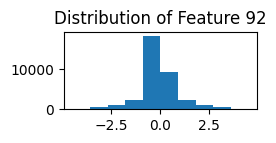

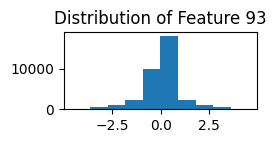

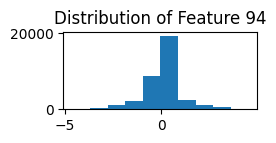

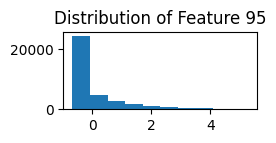

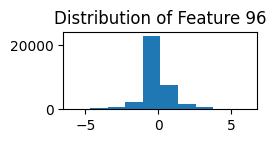

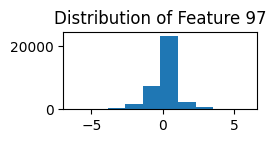

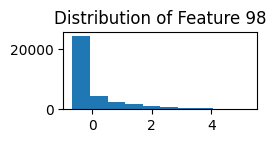

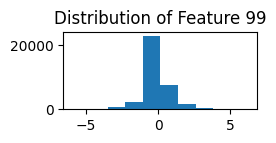

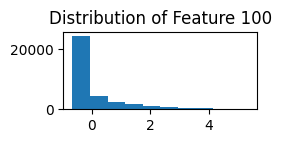

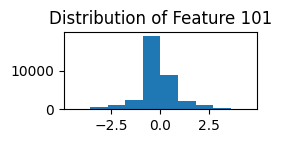

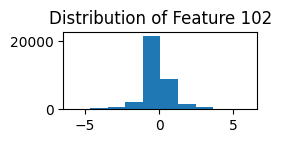

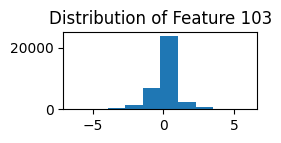

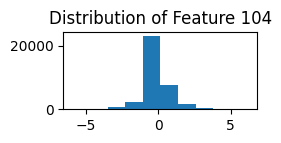

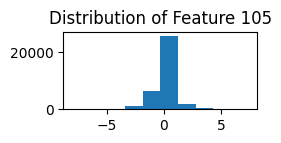

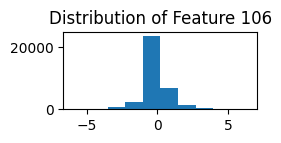

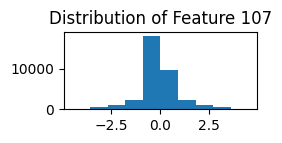

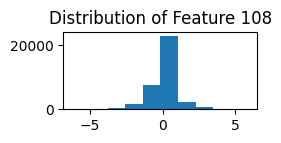

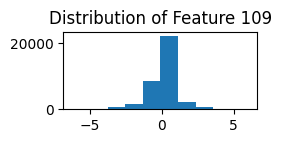

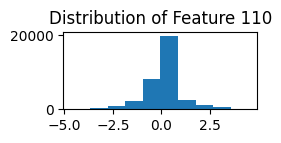

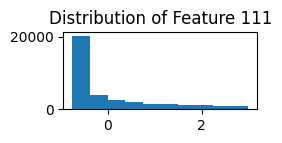

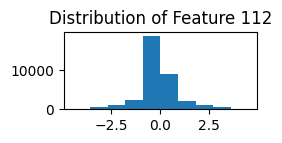

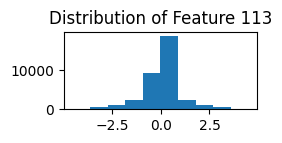

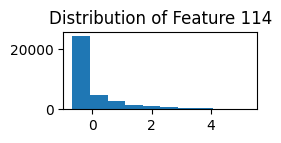

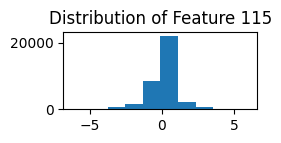

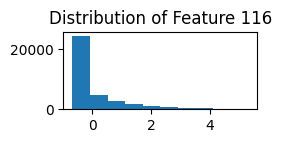

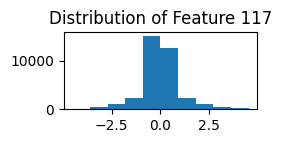

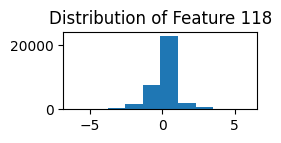

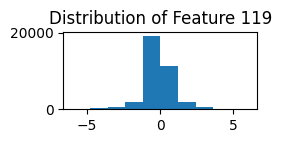

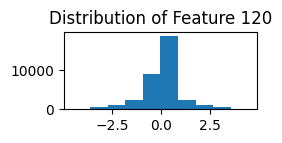

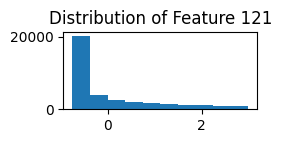

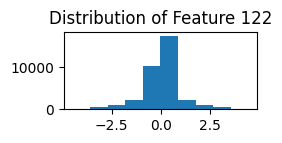

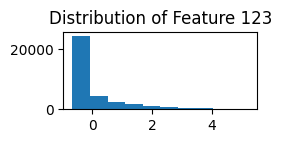

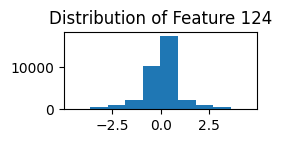

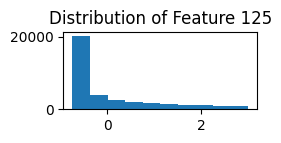

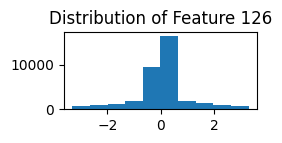

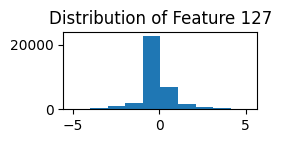

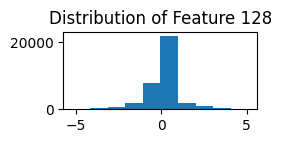

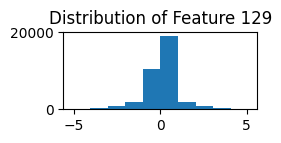

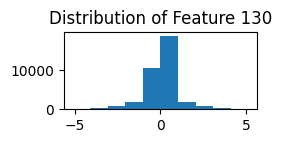

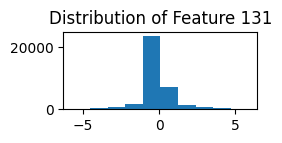

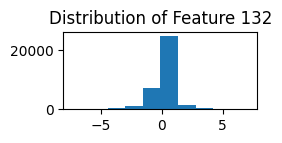

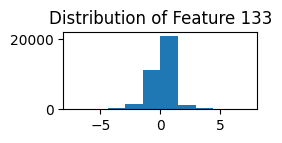

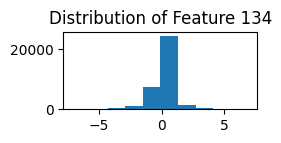

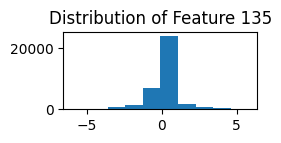

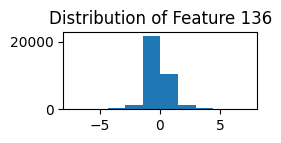

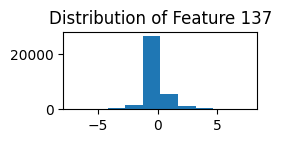

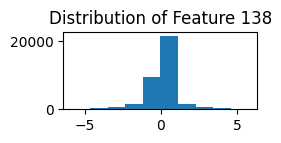

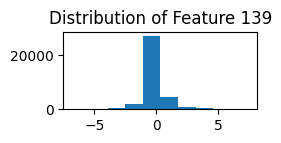

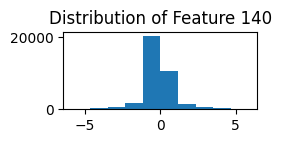

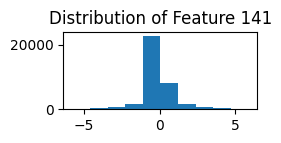

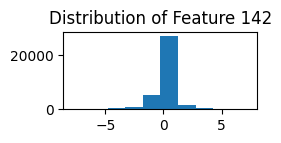

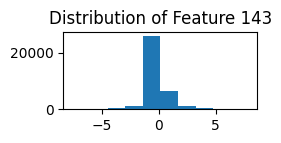

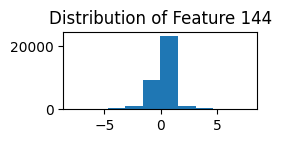

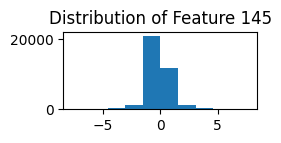

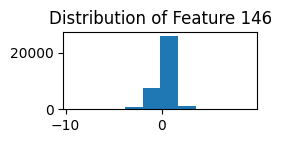

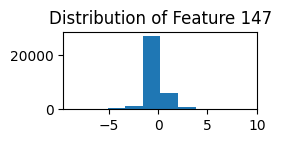

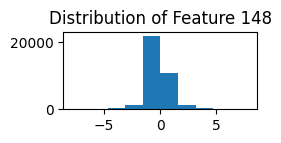

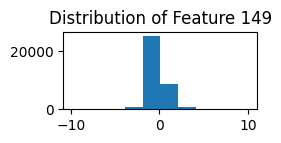

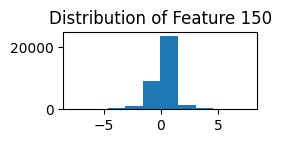

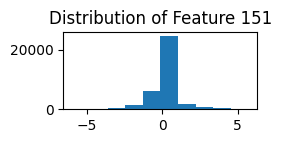

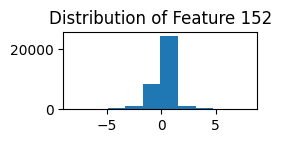

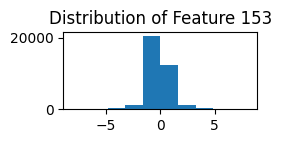

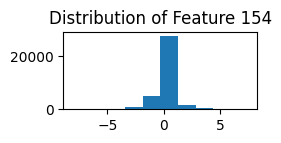

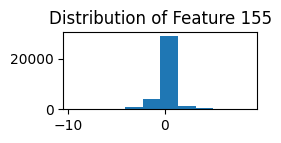

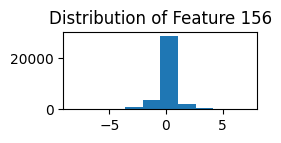

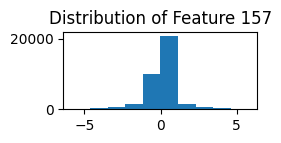

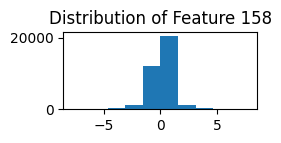

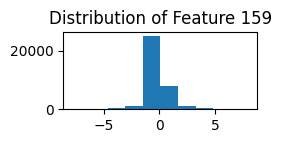

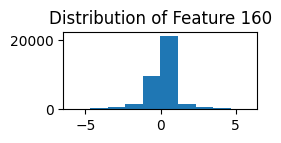

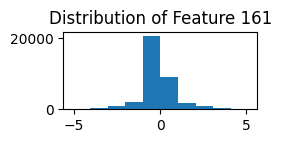

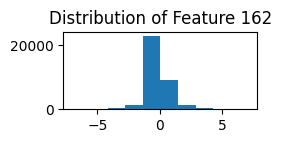

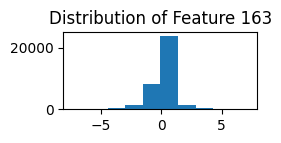

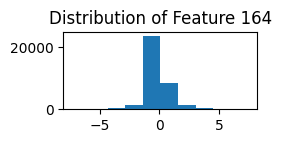

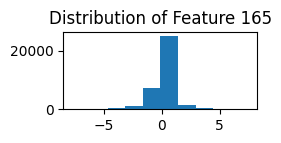

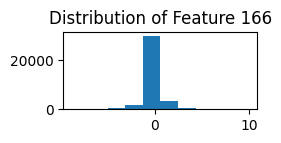

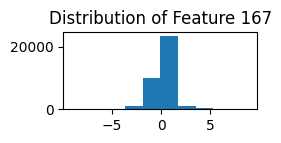

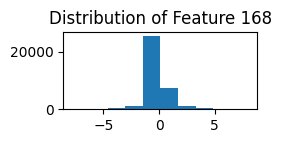

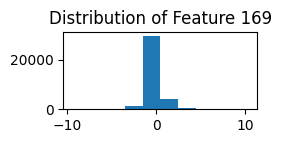

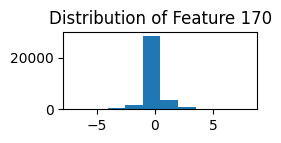

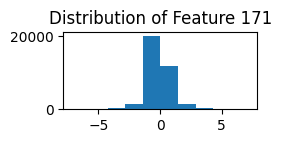

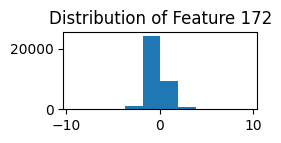

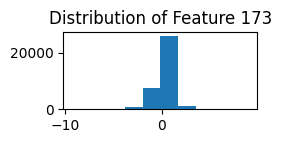

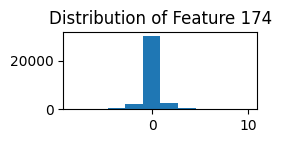

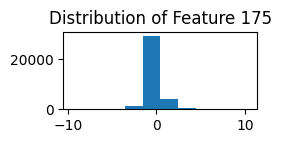

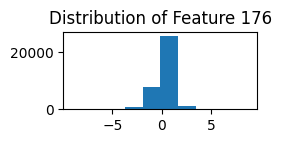

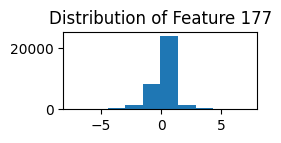

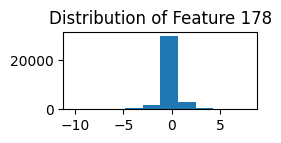

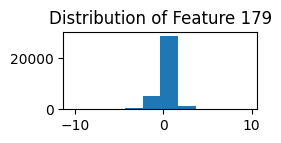

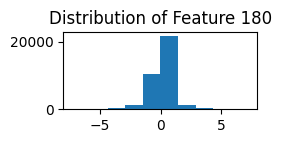

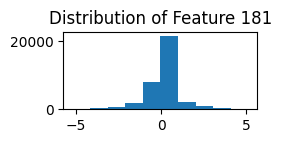

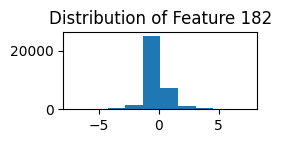

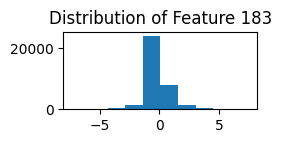

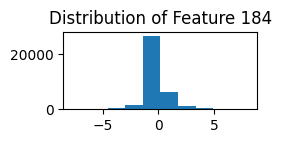

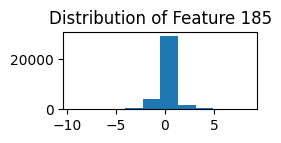

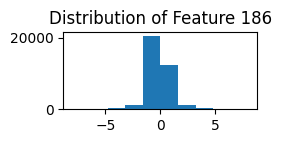

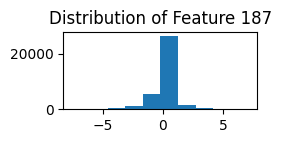

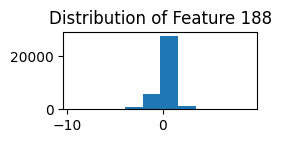

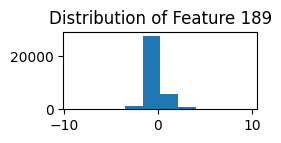

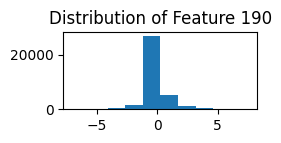

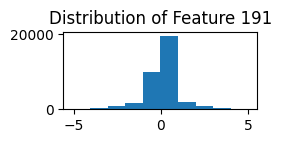

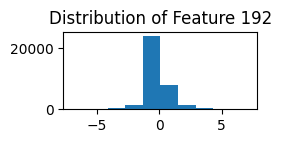

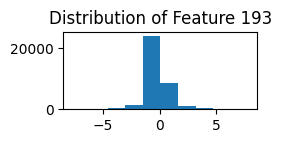

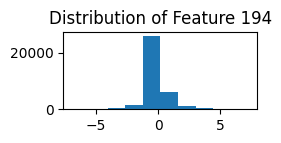

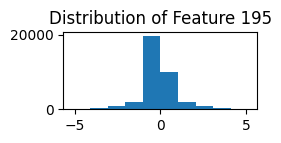

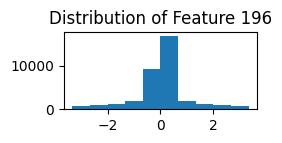

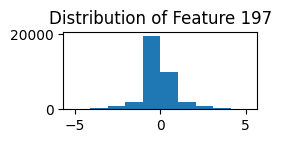

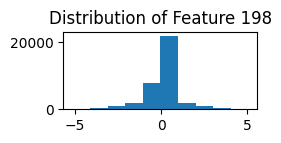

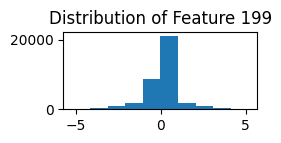

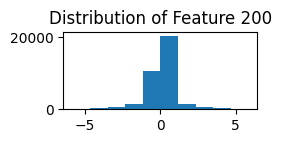

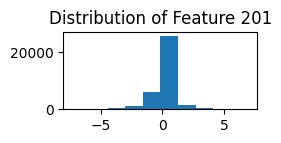

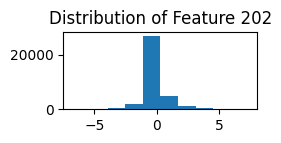

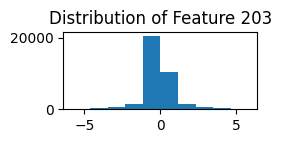

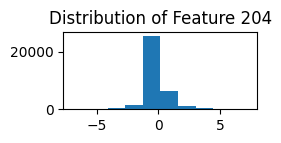

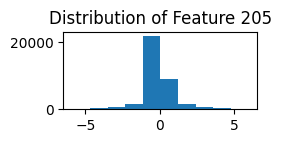

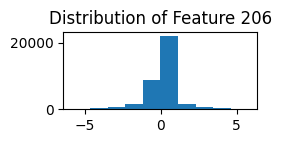

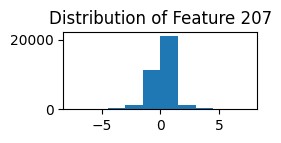

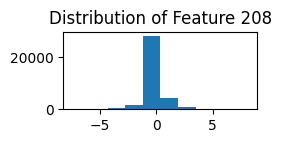

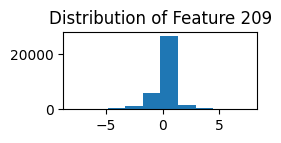

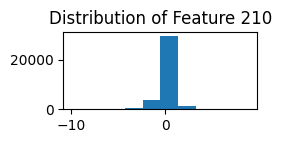

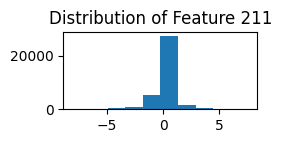

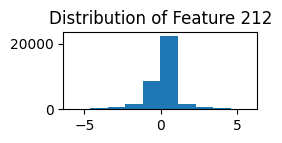

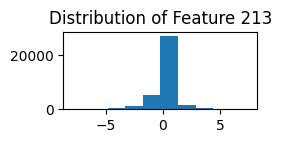

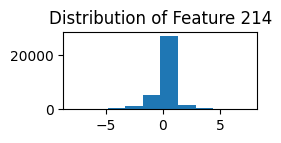

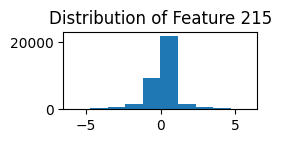

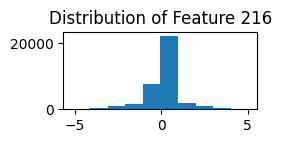

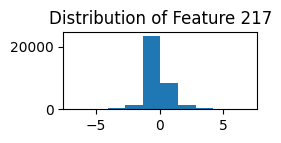

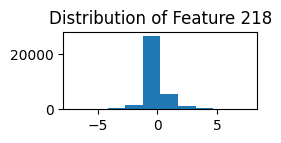

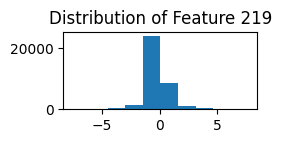

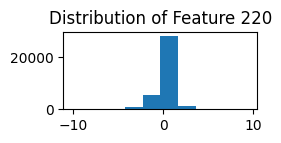

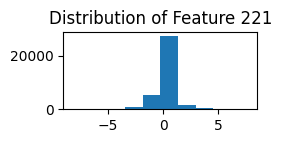

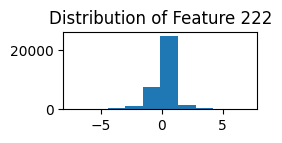

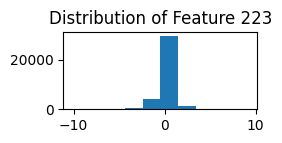

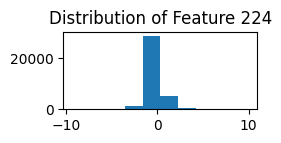

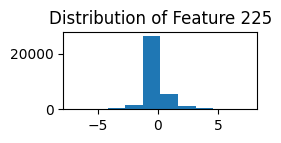

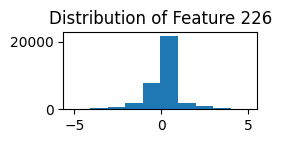

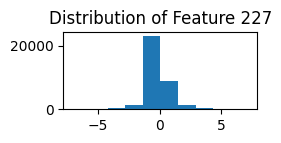

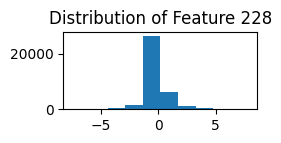

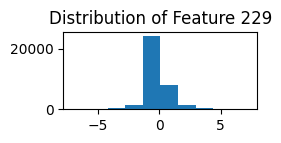

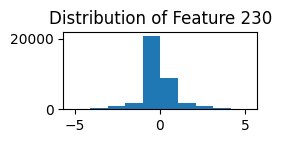

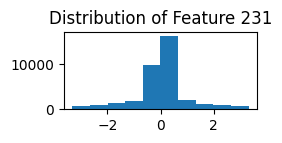

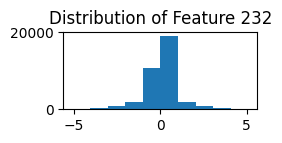

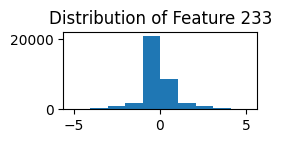

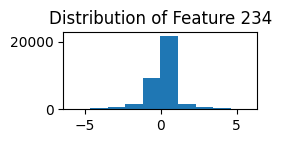

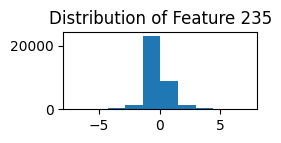

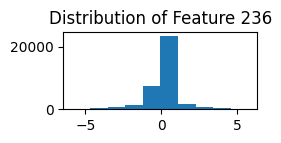

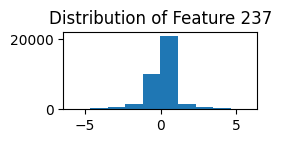

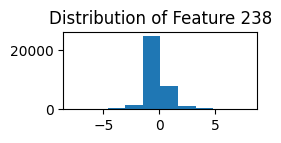

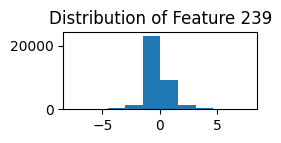

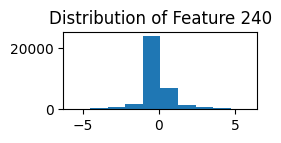

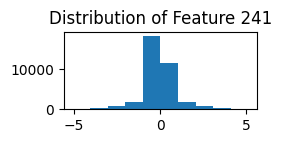

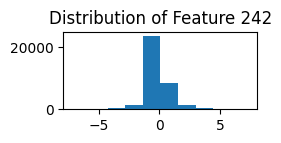

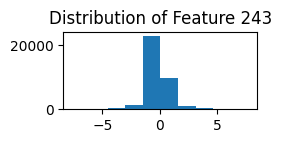

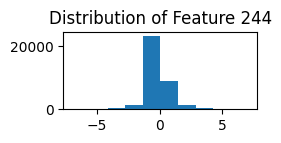

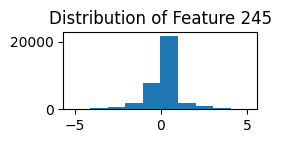

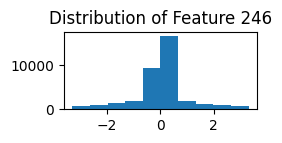

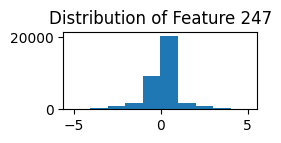

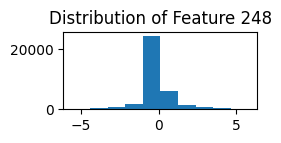

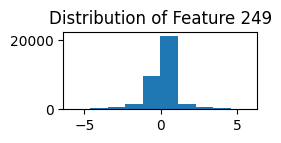

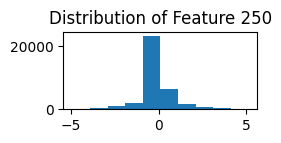

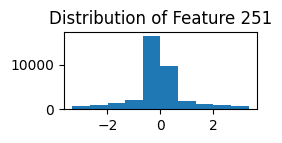

In [ ]:
#plot data points
plt.figure(figsize=(2.5, 1))
plt.plot(x_train_pr[:,0], x_train_pr[:,1], 'xr',markersize=1)
plt.title("Data Set with normalisation")
plt.ylabel('Feature 1')
plt.xlabel(f'Feature 2')
plt.show()
for i in range(n):
  plt.figure(figsize=(2.5, 1))
  plt.title(f"Distribution of Feature {i+1}")
  plt.hist(x_train_pr[:,i])
  plt.show()

In [ ]:
w_initial=np.zeros(n)
b_initial=0.0

**Calculating final values of w,b**

In [ ]:
#calculating final value of w and b
iterations=1000
alpha=0.018
lambda_=0.1
w,b,J_history1,it_history1=gradient_descent(x_train_pr,y_train_pr,w_initial,b_initial,alpha,compute_gradient,iterations,lambda_)
print(w,b,compute_cost(x_train_pr,y_train_pr,w,b,lambda_))

iteration= 0 cost= 5.1254625123732926e-17 dw= [-1.25159643e-09 -1.33552995e-10 -1.49230242e-09 -7.40653330e-10
 -1.53340913e-10 -3.60002115e-09  1.11973011e-09 -3.75196457e-09
  1.61097166e-09 -1.55363005e-09  1.82276280e-09  2.29016611e-09
  1.96502176e-11  2.52770158e-10 -7.09023296e-10 -6.30911945e-11
 -5.30539054e-10  4.84639482e-10  1.30121422e-09  2.35557147e-09
 -1.22781868e-09 -4.43155473e-10 -1.30411927e-09 -2.26907833e-10
 -3.49794776e-10 -2.21782180e-10  4.79007881e-10 -4.59401939e-10
  6.72197477e-10 -1.57426572e-09 -2.52033056e-10  2.96635525e-10
 -1.46797263e-09  8.41992182e-10 -1.13202235e-09 -1.32834957e-10
 -2.07033314e-09 -1.56213607e-09 -1.31169559e-11 -6.73812916e-11
 -6.65521047e-10 -1.38227050e-09  1.98654516e-10 -9.93557074e-10
 -5.21900214e-12 -1.49843592e-09 -1.45004419e-10  3.32426803e-10
 -1.39465246e-09  2.73614479e-11 -1.42005411e-09 -7.40298050e-10
 -6.95334254e-10 -3.89923904e-10 -2.47844563e-10 -3.85591883e-09
  7.78105653e-10 -3.82610035e-09  1.85305029

**Cost vs Iterations**

Text(0, 0.5, 'Cost Function')

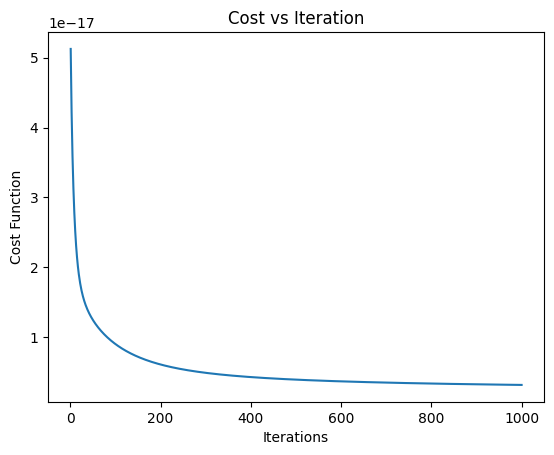

In [ ]:
#plot cost vs iteration
plt.plot(it_history1,J_history1)
plt.title('Cost vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

In [ ]:
w_final2=w
b_final2=b

**Mean squared error on cross validation data**

In [ ]:
y_pred_pr_cv=np.zeros(m)
y_pred_pr_cv=np.dot(x_cv_pr,w_final2)+b_final2
err=(y_pred_pr_cv-y_cv_pr)**2
print(y_pred_pr_cv,y_cv_pr,sep='\n')
err=np.mean(err)
print('Mean squared error=',err)
J_cv_pr=err/2
print('J_cv_pr=',J_cv_pr)

[-1.29714481e-09  1.58207537e-08  1.87015568e-09 ...  2.70858635e-10
 -9.44566669e-09  2.62179840e-10]
[-1.19469068e-09  1.42460128e-08  1.54444723e-09 ...  3.15303571e-09
 -1.11576175e-08  3.59164097e-10]
Mean squared error= 6.7588715082570775e-18
J_cv_pr= 3.3794357541285388e-18


**R2 Score on cross validation data**

In [ ]:
def r2_score(y,y_pred):
  y_mean=np.mean(y)
  ss_tot=np.sum((y-y_mean)**2)
  ss_res=np.sum((y-y_pred)**2)
  r2=1-(ss_res/ss_tot)
  return r2

In [ ]:
r2_score_cv=r2_score(y_cv_pr,y_pred_pr_cv)
print('R2 Score on cross validation data=',r2_score_cv)

R2 Score on cross validation data= 0.9401961211794511


**R2 Score on training data**

In [ ]:
r2_score_train=r2_score(y_train_pr,np.dot(x_train_pr,w_final2)+b_final2)
print('R2 Score on training data=',r2_score_train)

R2 Score on training data= 0.9448233860991884


**Target vs Prediction for original features**

[-1.27465809e-08 -4.12361882e-08  2.44180050e-10 ... -1.09620443e-08
  1.96209742e-09  5.00055158e-10]
[-1.20672180e-08 -2.83451936e-08 -1.40068829e-09 ... -1.53695929e-08
  2.52504772e-09  2.26982086e-09]


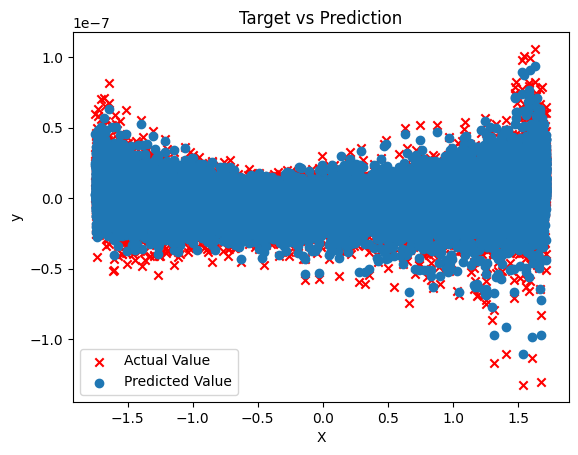

In [ ]:
y_pred_pr_train=np.dot(x_train_pr,w_final2)+b_final2
print(y_train_pr,y_pred_pr_train,sep='\n')
y_j=y_train_pr
x_j=x_train_pr[:,0]
plt.scatter(x_j, y_j, marker='x', c='r', label="Actual Value"); plt.title("Target vs Prediction")
plt.scatter(x_j,np.dot(x_train_pr,w_final2)+b_final2, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

**Prediction of y for test data**

In [ ]:
y_pred_pr=np.zeros(x_test_pr.shape[0])
for i in range(x_test_pr.shape[0]):
 y_pred_pr[i]=np.dot(x_test_pr[i],w_final2)+b_final2
print(y_pred_pr)

[ 1.20837063e-08 -1.17801897e-08 -2.86312773e-10 ... -2.48740230e-09
 -2.95225039e-09 -1.38660282e-09]


## **Implementing Binary Classification**

In [ ]:
cb_train=pd.read_csv('/content/binary_classification_train.csv')
cb_test=pd.read_csv('/content/binary_classification_test.csv')

**Separating input and output**

In [ ]:
x_train_cb=cb_train.drop(columns=['Class', 'ID'])
y_train_cb=cb_train['Class']
x_test_cb=cb_test.drop(columns=['ID'])
y_train_cb=y_train_cb.to_numpy(dtype='float128')
x_train_cb=x_train_cb.to_numpy(dtype='float128')
x_test_cb=x_test_cb.to_numpy(dtype='float128')
m,n=x_train_cb.shape

**Cross Validation data**

In [ ]:
x_cv_cb=x_train_cb[0:6000,:]
y_cv_cb=y_train_cb[0:6000]
x_train_cb=x_train_cb[6000:,:]
y_train_cb=y_train_cb[6000:]

**Shape of x train**

In [ ]:
m,n=x_train_cb.shape
m,n

(42000, 20)

**Before z-score normalisation**

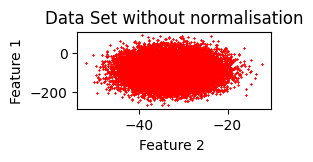

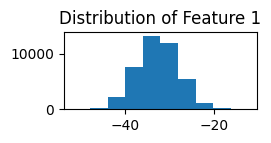

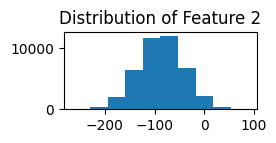

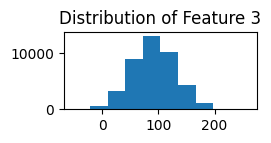

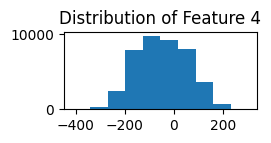

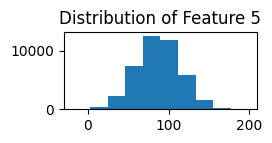

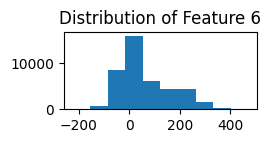

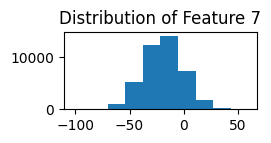

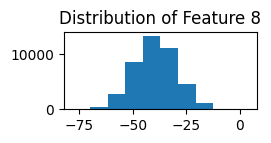

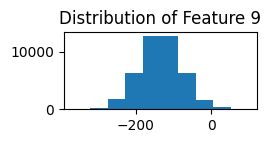

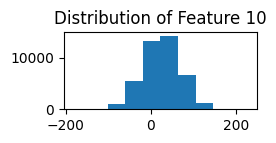

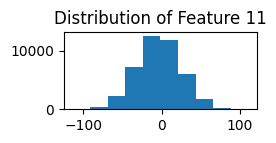

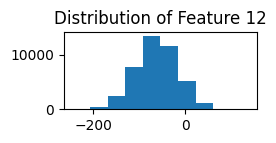

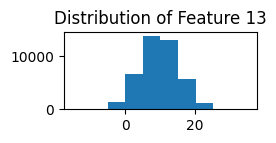

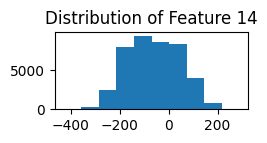

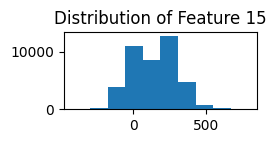

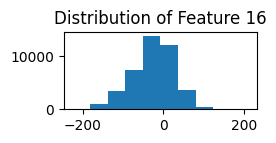

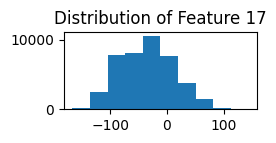

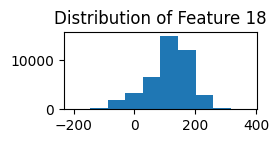

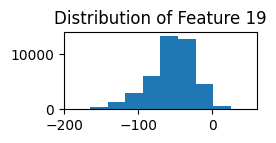

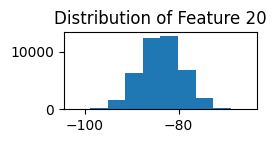

In [ ]:
#plot data points
plt.figure(figsize=(2.5, 1))
plt.plot(x_train_cb[:,0], x_train_cb[:,1], 'xr',markersize=1)
plt.title("Data Set without normalisation")
plt.ylabel('Feature 1')
plt.xlabel(f'Feature 2 ')
plt.show()
for i in range(n):
  plt.figure(figsize=(2.5, 1))
  plt.title(f"Distribution of Feature {i+1}")
  plt.hist(x_train_cb[:,i])
  plt.show()

**Z-Score Normalisation**

In [ ]:
x_train_cb,x_mu,x_sigma=z_score(x_train_cb)
x_cv_cb=(x_cv_cb-x_mu)/x_sigma
x_test_cb=(x_test_cb-x_mu)/x_sigma

**After z-score normalisation**

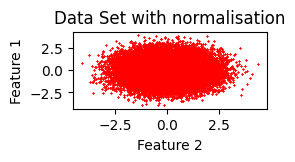

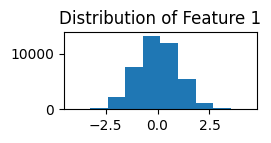

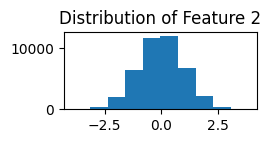

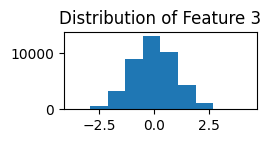

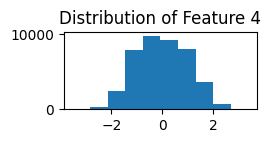

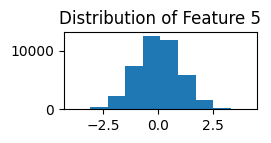

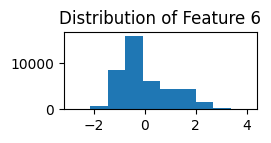

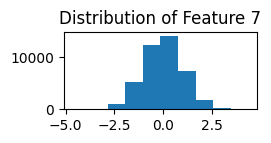

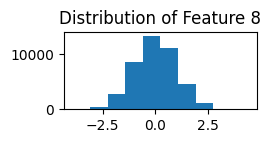

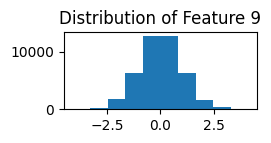

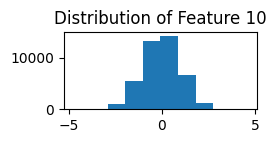

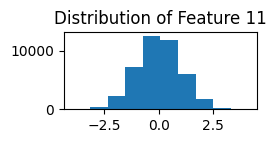

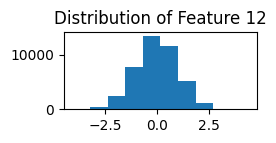

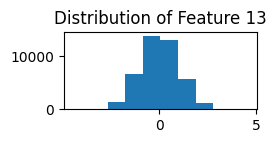

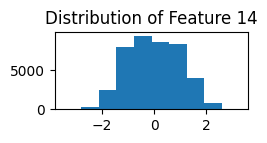

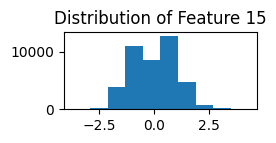

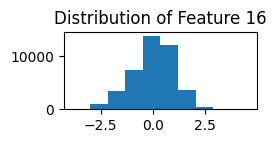

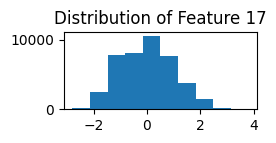

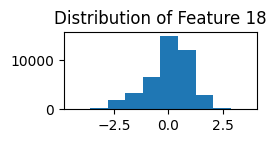

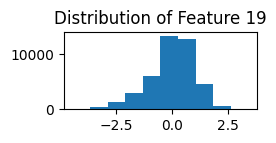

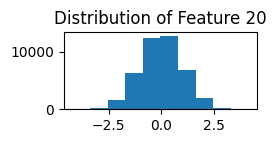

In [ ]:
#plot data points
plt.figure(figsize=(2.5, 1))
plt.plot(x_train_cb[:,0], x_train_cb[:,1], 'xr',markersize=1)
plt.title("Data Set with normalisation")
plt.ylabel('Feature 1')
plt.xlabel(f'Feature 2')
plt.show()
for i in range(n):
  plt.figure(figsize=(2.5, 1))
  plt.title(f"Distribution of Feature {i+1}")
  plt.hist(x_train_cb[:,i])
  plt.show()

**Compute sigmoid**

In [ ]:
def compute_sigmoid(z):
  z=np.exp(-z)
  return 1/(1+z)

Text(0.5, 0, 'z')

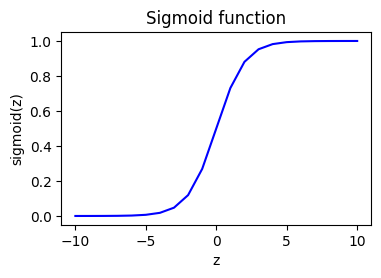

In [ ]:
z_tmp = np.arange(-10,11)
y = compute_sigmoid(z_tmp)
fig,ax = plt.subplots(1,1,figsize=(4,2.5))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

**Compute cost**

In [ ]:
def compute_cost_logistic(x,y,w,b,lambda_):
  m=x.shape[0]
  z_i=np.dot(x,w)+b
  f_wb_i=compute_sigmoid(z_i)
  cost=np.sum((-y*np.log(f_wb_i)-(1-y)*np.log(1-f_wb_i)))+lambda_*(np.sum(w**2))/2
  cost=cost/m
  return cost

**Compute gradient**

In [ ]:
def compute_gradient_logistic(x,y,w,b,lambda_):
  m,n=x.shape
  dw,db=np.zeros((n,)),0.0
  z_i=np.dot(x,w)+b
  f_wb_i=compute_sigmoid(z_i)
  for j in range(n):
    dw[j]=np.sum((f_wb_i-y)*x[:,j])+lambda_*w[j]
  db=np.sum(f_wb_i-y)
  dw=dw/m
  db=db/m
  return dw,db


**Gradient Descent**

In [ ]:
def gradient_descent_logistic(x,y,w,b,alpha,compute_gradient,num_iters,lambda_):
  J=[]
  it=[]
  for i in range(num_iters):
    dw,db=compute_gradient_logistic(x,y,w,b,lambda_)
    w=w-alpha*dw
    b=b-alpha*db
    J.append(compute_cost_logistic(x,y,w,b,lambda_))
    it.append(i+1)
    if i%100==0:
      print("iteration=",i,"cost=",compute_cost_logistic(x,y,w,b,lambda_),'dw=',dw,'db=',db)
  return w,b,J,it

**Calculating final values of w,b**

In [ ]:
#calculating final value of w and b
w_initial=np.zeros(n)
b_initial=-1
iterations=2000
alpha=0.04
lambda_=1
w,b,J_history3,it_history3=gradient_descent_logistic(x_train_cb,y_train_cb,w_initial,b_initial,alpha,compute_gradient_logistic,iterations,lambda_)
print(w,b,compute_cost_logistic(x_train_cb,y_train_cb,w,b,lambda_))

iteration= 0 cost= 0.6197468090263724454 dw= [-3.08979419e-03  1.14507276e-03 -4.42205587e-04 -2.34177472e-03
 -3.87599435e-03 -3.51002978e-01 -2.19938018e-03  2.39076695e-04
 -1.37263233e-03 -3.52102212e-03  2.11718233e-03  1.84545843e-03
 -1.34589158e-04 -2.00547404e-04 -1.01401894e-01  1.72370586e-01
 -2.56098319e-01  1.90390981e-01  1.74398277e-01  2.50871466e-03] db= -0.04934429291571916495
iteration= 100 cost= 0.3128968591547724483 dw= [-1.33296107e-03  1.20615697e-03 -2.65680491e-04  3.34166921e-02
 -6.14150430e-04 -9.81150169e-02 -8.84300787e-04 -9.93111035e-05
 -1.34289408e-02 -1.14858756e-03  2.13559153e-03  3.69169616e-04
  1.05466960e-03 -2.20533494e-02 -4.15449325e-02  2.43967829e-02
 -5.16326895e-02  2.82256821e-02  1.06466029e-02  7.46498973e-04] db= 0.0033594500026178368118
iteration= 200 cost= 0.2756037309284554846 dw= [-0.0005459   0.00086327 -0.00033903  0.02247397 -0.00018973 -0.05113623
 -0.00071877 -0.00024332 -0.01248938 -0.00064449  0.00162869  0.00029023
  0.00

In [ ]:
w_final3=w
b_final3=b

**Cost vs Iterations**

Text(0, 0.5, 'Cost Function')

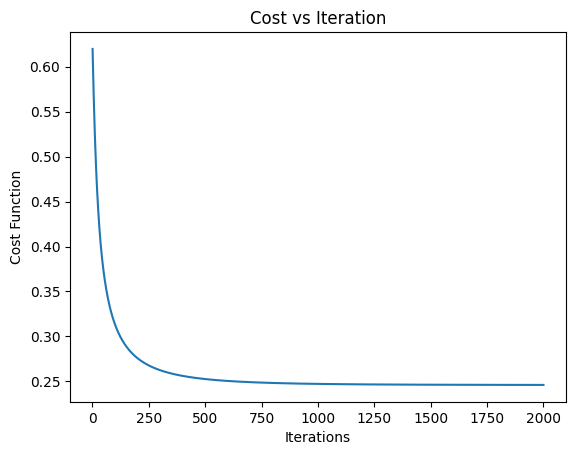

In [ ]:
#plot cost vs iteration
plt.plot(it_history3,J_history3)
plt.title('Cost vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

**Prediction of y for test data**

In [ ]:
y_pred_cb=np.zeros(x_test_cb.shape[0])
for i in range(x_test_cb.shape[0]):
  z_i=np.dot(x_test_cb[i],w_final3)+b_final3
  y_pred_cb[i]=compute_sigmoid(z_i)
  if(y_pred_cb[i]>0.5):
    y_pred_cb[i]=1
  else:
    y_pred_cb[i]=0
print(y_pred_cb)

[0. 0. 0. ... 0. 1. 0.]


**Accuracy on Training Data**

In [ ]:
y_pred_cb_train=np.zeros(x_train_cb.shape[0])
for i in range(x_train_cb.shape[0]):
  z_i=np.dot(x_train_cb[i],w_final3)+b_final3
  y_pred_cb_train[i]=compute_sigmoid(z_i)
  if(y_pred_cb_train[i]>0.5):
    y_pred_cb_train[i]=1
  else:
    y_pred_cb_train[i]=0
print(y_pred_cb_train)
print(y_train_cb)
acc=100.0-np.mean(np.abs(y_pred_cb_train-y_train_cb))*100
print('Accuracy on training data=',acc)

[0. 0. 1. ... 0. 0. 1.]
[0. 0. 1. ... 0. 0. 1.]
Accuracy on training data= 93.52380952380952381


**Prediction for cross validation data**

In [ ]:
y_pred_cb_cv=compute_sigmoid(np.dot(x_cv_cb,w_final3)+b_final3)
for i in range(y_pred_cb_cv.shape[0]):
  if(y_pred_cb_cv[i]>0.5):
    y_pred_cb_cv[i]=1
  else:
    y_pred_cb_cv[i]=0
print(y_pred_cb_cv,y_cv_cb,sep='\n')

[0. 1. 0. ... 1. 0. 0.]
[0. 1. 0. ... 1. 0. 0.]


**Accuracy on cross validation data**

In [ ]:
acc=(1-np.mean(np.abs(y_pred_cb_cv-y_cv_cb)))*100
print('Accuracy on cross validation data=',acc)

Accuracy on cross validation data= 93.2


**Precision on cross validation data**

In [ ]:
true_pos=0
false_pos=0
false_neg=0
for i in range(y_cv_cb.shape[0]):
  if(y_pred_cb_cv[i]==1 and y_cv_cb[i]==1):
    true_pos+=1
  elif(y_pred_cb_cv[i]==0 and y_cv_cb[i]==1):
    false_neg+=1
precision=true_pos/np.sum(y_pred_cb_cv)
print('Precision on cross validation data=',precision)


Precision on cross validation data= 0.92647058823529411764


**Recall on cross validation data**

In [ ]:
recall=true_pos/(true_pos+false_neg)
print('Recall on cross validation data=',recall)

Recall on cross validation data= 0.8549060542797495


**F1 Score on cross validation data**

In [ ]:
f1_score=2*precision*recall/(precision+recall)
print('F1 Score on cross validation data=',f1_score)

F1 Score on cross validation data= 0.8892508143322475838


### **Multi classification**

In [ ]:
cm_train=pd.read_csv('/content/multi_classification_train.csv')
cm_test=pd.read_csv('/content/multi_classification_test.csv')

**Separating input and output**

In [ ]:
x_train_cm=cm_train.drop(columns=['Class', 'ID'])
y_train_cm=cm_train['Class']
x_test_cm=cm_test.drop(columns=['ID'])
y_train_cm=y_train_cm.to_numpy(dtype='int')
x_train_cm=x_train_cm.to_numpy(dtype='float128')
x_test_cm=x_test_cm.to_numpy(dtype='float128')
m,n=x_train_cm.shape

**Cross Validation data**

In [ ]:
x_cv_cm=x_train_cm[0:6000,:]
y_cv_cm=y_train_cm[0:6000]
x_train_cm=x_train_cm[6000:,:]
y_train_cm=y_train_cm[6000:]

**Shape of x train**

In [ ]:
m,n=x_train_cm.shape
m,n

(42000, 20)

**Before z-score normalisation**

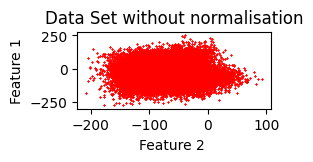

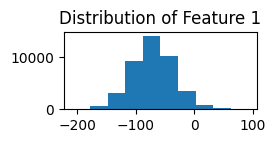

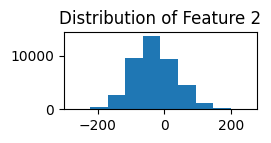

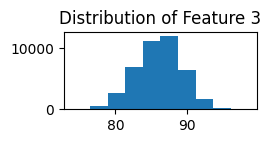

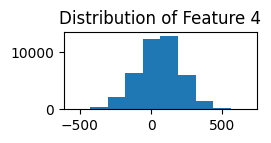

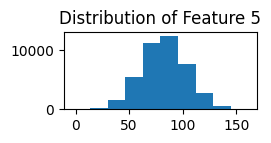

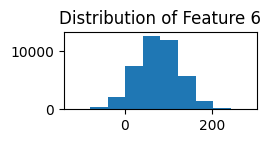

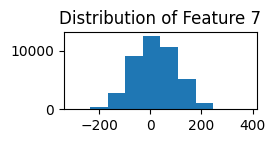

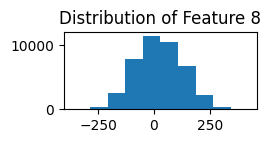

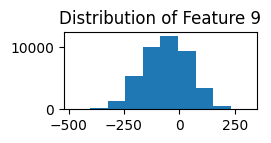

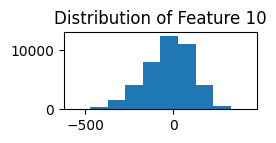

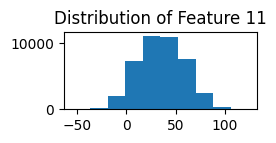

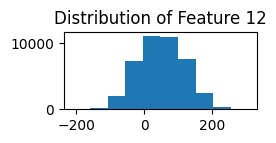

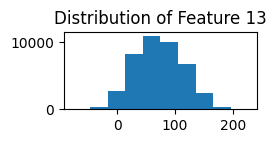

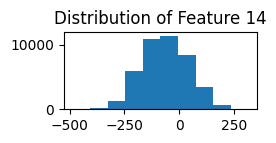

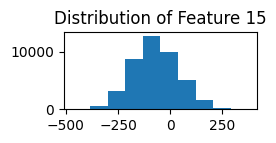

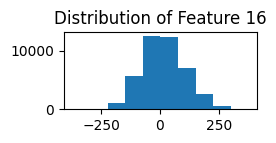

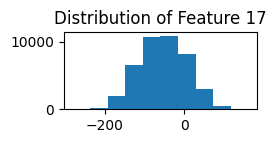

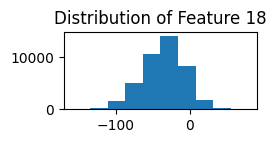

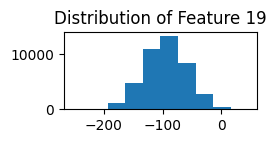

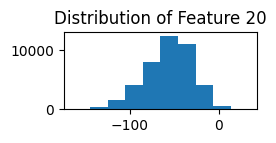

In [ ]:
#plot data points
plt.figure(figsize=(2.5, 1))
plt.plot(x_train_cm[:,0], x_train_cm[:,1], 'xr',markersize=1)
plt.title("Data Set without normalisation")
plt.ylabel('Feature 1')
plt.xlabel(f'Feature 2 ')
plt.show()
for i in range(n):
  plt.figure(figsize=(2.5, 1))
  plt.title(f"Distribution of Feature {i+1}")
  plt.hist(x_train_cm[:,i])
  plt.show()

**Z- Score Normalisation**

In [ ]:
x_train_cm,x_mu,x_sigma=z_score(x_train_cm)
x_cv_cm=(x_cv_cm-x_mu)/x_sigma
x_test_cm=(x_test_cm-x_mu)/x_sigma

**After z-score normalisation**

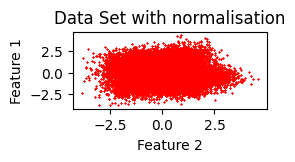

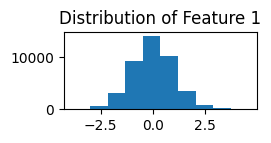

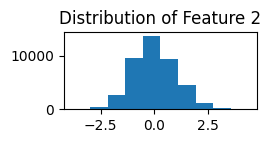

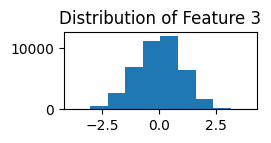

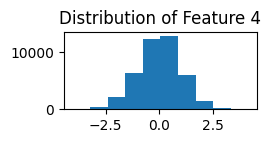

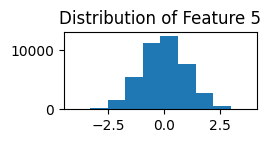

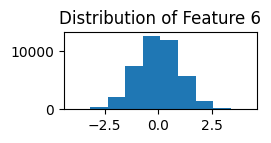

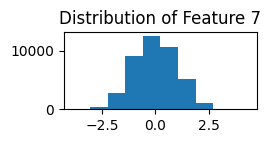

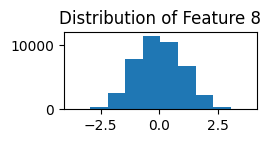

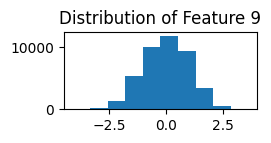

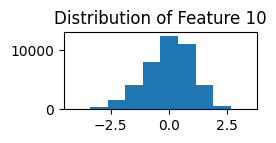

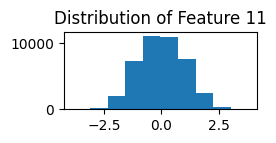

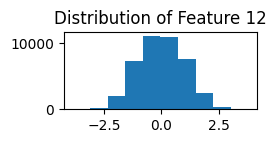

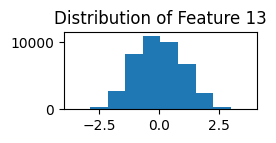

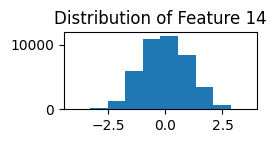

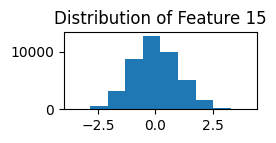

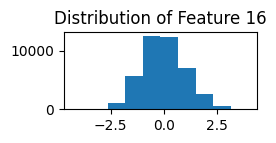

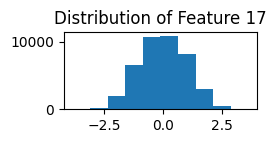

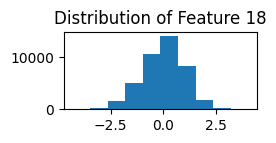

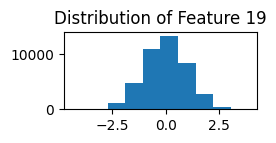

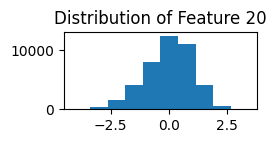

In [ ]:
#plot data points
plt.figure(figsize=(2.5, 1))
plt.plot(x_train_cm[:,0], x_train_cm[:,1], 'xr',markersize=1)
plt.title("Data Set with normalisation")
plt.ylabel('Feature 1')
plt.xlabel(f'Feature 2')
plt.show()
for i in range(n):
  plt.figure(figsize=(2.5, 1))
  plt.title(f"Distribution of Feature {i+1}")
  plt.hist(x_train_cm[:,i])
  plt.show()

**Total Unique Classes in Data**

In [ ]:
class_no=np.unique(y_train_cm)
class_no

array([0, 1, 2, 3, 4])

**Compute Cost**

In [ ]:
def compute_cost_multi(x,y,w,b,lambda_,class_no):
  f_wb_i=x@w.T+b
  f_wb_i=np.exp(f_wb_i-np.max(f_wb_i,axis=1,keepdims=True))
  f_wb_i=-np.log((f_wb_i/np.sum(f_wb_i,axis=1,keepdims=True))[np.arange(x.shape[0]),y])
  cost=np.mean(f_wb_i)+lambda_*(np.sum(w**2))/(2*x.shape[0])
  return cost

**Compute gradient**

In [ ]:
def compute_gradient_multi(x,y,w,b,lambda_,class_no):
  m,n=x.shape
  dw,db=np.zeros((class_no.shape[0],n)),np.zeros(class_no.shape[0])
  f_wb_i=x@w.T+b
  f_wb_i=np.exp(f_wb_i-np.max(f_wb_i,axis=1,keepdims=True))
  f_wb_i=(f_wb_i/np.sum(f_wb_i,axis=1,keepdims=True))
  f_wb_i=f_wb_i[np.arange(m),y]
  for i in range(class_no.shape[0]):
    one_hot=np.zeros(m)
    one_hot[y==i]=1
    f_wb_y=f_wb_i-one_hot
    for j in range(n):
      dw[i][j]=np.sum(x[:,j]*f_wb_y)
    db[i]=np.sum(f_wb_y)
  return dw/m,db/m

**Gradient Descent**

In [ ]:
def gradient_descent_multi(x,y,w,b,alpha,compute_gradient,num_iters,lambda_,class_no):
  J=[]
  it=[]
  for i in range(num_iters):
    dw,db=compute_gradient_multi(x,y,w,b,lambda_,class_no)
    w=w-alpha*dw
    b=b-alpha*db
    J.append(compute_cost_multi(x,y,w,b,lambda_,class_no))
    it.append(i+1)
    if i%100==0:
      print("iteration=",i,"cost=",compute_cost_multi(x,y,w,b,lambda_,class_no),'dw=',dw,'db=',db)
  return w,b,J,it

**Calculating final values of w,b**

In [ ]:
#calculating final value of w and b
w_initial=np.zeros((class_no.shape[0],n))
b_initial=np.zeros(class_no.shape[0])
iterations=1700
alpha=0.002
lambda_=1
w,b,J_history4,it_history4=gradient_descent_multi(x_train_cm,y_train_cm,w_initial,b_initial,alpha,compute_gradient_multi,iterations,lambda_,class_no)
print(w,b,compute_cost_multi(x_train_cm,y_train_cm,w,b,lambda_,class_no))

iteration= 0 cost= 1.607926000489006746 dw= [[ 6.68444240e-03  2.66186404e-02 -2.44176939e-02  2.00898320e-02
   1.01604888e-03  8.65917959e-04  4.04306758e-02  4.17081777e-02
  -5.34122464e-02  6.63636360e-02  2.32549588e-04  2.32549588e-04
   5.74372126e-02  1.71274735e-03  6.23628388e-02 -3.10060058e-02
  -5.63671457e-02 -2.48993925e-02 -1.19164886e-03  6.63636360e-02]
 [ 2.72508412e-02 -2.38528656e-01  8.28925221e-02  1.27185433e-01
  -4.15869833e-04  2.35410955e-04 -3.10704238e-02 -3.13872526e-02
   1.39727803e-01 -1.00598459e-01 -1.57134939e-01 -1.57134939e-01
   1.21810784e-03 -1.43450590e-01  5.40262161e-02 -9.46430558e-02
  -6.98786078e-03 -7.44363870e-02  5.56034459e-04 -1.00598459e-01]
 [-2.40107910e-02  1.07355717e-01 -1.12758841e-01 -1.01253962e-01
   1.90412639e-04 -2.40343085e-03 -4.22713645e-02 -4.34088607e-02
  -4.51541044e-03 -1.51978652e-01  2.33881515e-01  2.33881515e-01
   1.21241717e-02  4.47723429e-03 -8.21655242e-02  1.05818670e-01
   2.14420518e-01  1.23168800e

In [ ]:
w_final4=w
b_final4=b

**Cost vs Iterations**

Text(0, 0.5, 'Cost Function')

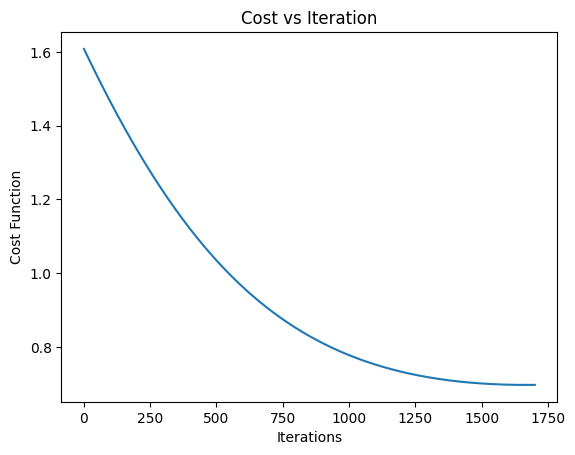

In [ ]:
#plot cost vs iteration
plt.plot(it_history4,J_history4)
plt.title('Cost vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

**Prediction of y for test data**

In [ ]:
y_pred_cm=np.zeros(x_test_cm.shape[0])
z_i=np.exp(x_test_cm@w_final4.T+b_final4)
z_i=z_i/np.sum(z_i,axis=1,keepdims=True)
y_pred_cm=np.argmax(z_i,axis=1)
y_pred_cm

**Prediction for cross validation Data**

In [ ]:
y_pred_cm_cv=np.zeros(x_cv_cm.shape[0])
z_i=np.exp(x_cv_cm@w_final4.T+b_final4)
z_i=z_i/np.sum(z_i,axis=1,keepdims=True)
y_pred_cm_cv=np.argmax(z_i,axis=1)
y_pred_cm_cv

array([1, 2, 4, ..., 2, 3, 1])

**Precision on cross validation data**

In [ ]:
true_pos=np.zeros(class_no.shape[0])
false_pos=np.zeros(class_no.shape[0])
false_neg=np.zeros(class_no.shape[0])
for j in range(class_no.shape[0]):
 for i in range(y_cv_cm.shape[0]):
  if(y_pred_cm_cv[i]==j and y_cv_cm[i]==j):
    true_pos[j]+=1
  elif(y_pred_cm_cv[i]!=j and y_cv_cm[i]==j):
    false_neg[j]+=1
  elif(y_pred_cm_cv[i]==j and y_cv_cm[i]!=j):
    false_pos[j]+=1
precision=true_pos/(true_pos+false_pos)
print('Precision on cross validation data=',precision)

Precision on cross validation data= [0.79487179 0.75683891 0.79784017 0.64631043 0.73076923]


**Recall on cross validation data**

In [ ]:
recall=true_pos/(true_pos+false_neg)
print('Recall on cross validation data=',recall)

Recall on cross validation data= [0.12836439 0.87923729 0.8766018  0.79127726 0.40140845]


**F1 Score on cross validation data**

In [ ]:
f1_score=2*precision*recall/(precision+recall)
print('F1 Score on cross validation data=',f1_score)

F1 Score on cross validation data= [0.22103387 0.81345965 0.83536861 0.71148459 0.51818182]
